# Convolutional Neural Networks with Pytorch
## By Allen Huang

### 1. Introduction of Convolutional Neural Networks

The convolutional neural network, often referred to as a convnet or cnn.

Convolutional neural networks got their start by working with imagery. The idea of doing image analysis is to recognize things like objects, such as humans, or cars.

In order to recognize a car or a human, it's fairly challenging to do so if you're thinking of things 1 pixel at a time. Instead, a convolutional neural network aims to use a sliding window (a kernel) that takes into account a group of pixels, to hopefully recognize small features like "edges" or "curves" and then another layer might take combinations of edges or curves to detect shapes like squares or circles, or other complex types of shapes...and so on.

- you do not need to flatten the image like fully connected layers. CCN accepts two-dimensional input, even 3D. 

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://pythonprogramming.net/static/images/machine-learning/cat-example.png",width=400, height=400)

This is not just a image, it's pixels.

In [4]:
Image(url= "https://pythonprogramming.net/static/images/machine-learning/pixelated-image-example.png",width=400, height=400)

Two-dimensional array of pixels.

In [5]:
Image(url= "https://pythonprogramming.net/static/images/machine-learning/convolution-window.png",width=400, height=400)

We apply convolutions, which come over the image. The goal of convolutions is locate features. Here we use a 3 by 3 window(convolution kernal). It takes 3 by 3 pixels and look for feature. The first layer of CNN filters basically are these kernels tend to find things like edges or curves or corner. Then it pass through another layer which find more complex features that edges, curves or corners bulid, like circles, squares. 

In [6]:
Image(url= "https://pythonprogramming.net/static/images/machine-learning/convolution-stride.png",width=400, height=400)

It generate a scaler (some number), then perform another convolution.

In [7]:
Image(url= "https://pythonprogramming.net/static/images/machine-learning/convolution-new-featuremap.png",width=400, height=400)

Keep sliding that window over the entire image. In this picture, we got 4 features at the end.

In [9]:
Image(url= "https://pythonprogramming.net/static/images/machine-learning/pooling-window.png",width=400, height=400)

Finally, we got a new condensed version of our image, which means features for machine. Max pooling is takes the maximum value within the window. 

In [11]:
Image(url= "https://pythonprogramming.net/static/images/machine-learning/max-pooling-example.png",width=500, height=500)

Take all of these and we pull it. The first layer just find very basic features (combination of pixels). Then the next layer is going to make combination (features from the first layer). 

### 2. Preparing Data 

Dateset: https://www.microsoft.com/en-us/download/details.aspx?id=54765

for MAC: https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

This dataset consists of a bunch of images of cats and dogs. Different breeds, ages, sizes (both the animal and the image)..etc.

Once you have downloaded the dataset, you need to extract it. I would just extract it to the directory that you're working in.

In [2]:
import os
import cv2
import numpy as np
from tqdm import tqdm
# pip install opencv-python

In [3]:
REBUILD_DATA = False
# pre-processing dataset, you do not want to build data every single time you run your code. 

In [4]:
class DogsVSCats():
    IMG_SIZE = 50
    CATS = "/Users/hkmac/Desktop/Carzy_Allen_Github/Data_and_Testfile/kagglecatsanddogs_3367a/PetImages/Cat" 
    DOGS = "/Users/hkmac/Desktop/Carzy_Allen_Github/Data_and_Testfile/kagglecatsanddogs_3367a/PetImages/Dog"
    TESTING = "/Users/hkmac/Desktop/Carzy_Allen_Github/Data_and_Testfile/kagglecatsanddogs_3367a/PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    # the keys are cats and dogs, which are the directory.
    training_data = []
    catcount = 0
    dogcount = 0  # in order to check about balance

    def make_training_data(self):
        # iterate over directorys (cats and dogs), this will only returns the keys. Which means is CATS and DOGS directory
        for label in self.LABELS:
            # iterate over the pictures, os.listdir(label) will show all of the filename under the certain path
            for f in tqdm(os.listdir(label)):
            # tqdm is a process bar
                if "jpg" in f:
                # f is a fileanme 
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        # convert the image to grayscale, color does not matter but add data that we do not need
                        # load the image
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        # resize the img, pass in the size we want (50,50)
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  
                        # do something like print(np.eye(2)[1]), just makes one_hot, here we are going to use one_hot vector format
                        # here we got values for key (label) and then use it as a index
                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1
                            
                    except Exception as e:
                        # some of these images are not good, so loading will get an error
                        pass
                        # print(label, f, str(e)
        # shuffle the data
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

The IMG_SIZE is whatever we want, but we have to pick something. The images in the training data are all varying sizes and shapes. We're going to normalize all of the images by reshaping them to all be the same size. I will go with 50x50.

Next are just some variables that hold where the directories with the data are. Once extracted, you wind up with 2 directories. One is Cat, the other is Dog and those contain a bunch of images.

We want to iterate through these two directories, grab the images, resize, scale, convert the class to number (cats = 0, dogs = 1), and add them to our training_data.

In [5]:
# convert scalar into one_hot vector
cat = 0
dog = 1
# what index is hot? 0, so it's a cat~
[1,0]
# the way to convert is np.eye()

[1, 0]

In [6]:
np.eye(2)[cat]

array([1., 0.])

In [7]:
np.eye(2)[dog]

array([0., 1.])

In [8]:
!pwd

/Users/hkmac/Desktop/Carzy_Allen_Github/Deep Learning/Build Neural Networks with Pytorch


In [11]:
print(DogsVSCats().training_data[:3])

[]


In [12]:
training_data = np.load("/Users/hkmac/Desktop/Carzy_Allen_Github/Data_and_Testfile/kagglecatsanddogs_3367a/training_data.npy", allow_pickle=True)
print(len(training_data))
# that's all of our samples

24946


In [13]:
print(training_data[1])
# it's a dog~
print(training_data[2])
# a cat!

[array([[ 59,  60,  62, ...,  91,  12,  31],
       [ 58,  62,  65, ...,  94,   6,  22],
       [ 65,  63,  66, ...,  92,   9,  26],
       ...,
       [ 54, 162,  88, ...,  92, 150, 152],
       [ 84,  87,  84, ...,  86, 146, 153],
       [ 88,  98,  98, ...,  93, 113, 146]], dtype=uint8)
 array([0., 1.])]
[array([[ 76,  31,  19, ..., 119, 116,  74],
       [ 73,  31,  21, ..., 122, 121,  86],
       [ 61,  32,  20, ..., 121, 120,  98],
       ...,
       [  8,   6,  12, ..., 112, 108, 106],
       [  6,   6,  12, ..., 107, 106, 105],
       [  6,   5,   7, ..., 106, 104, 102]], dtype=uint8)
 array([1., 0.])]


In [14]:
training_data[2723][1]

array([0., 1.])

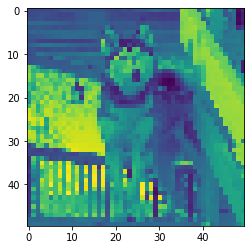

In [16]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0])
plt.show()

In [17]:
# Now we can split our training data into X and y, as well as convert it to a tensor
# We also need to shape this data (view it, according to Pytorch) in the way Pytorch expects us (-1, IMG_SIZE, IMG_SIZE)
import torch
X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

### 辅助理解

In [122]:
# 了解我们的数据，y实际上就是一个列表，而每一个元素是表示猫或者狗的列表 (one hot vector)
print(y)
print(y[0])
print(y[3])

tensor([[0., 1.],
        [0., 1.],
        [1., 0.],
        ...,
        [1., 0.],
        [0., 1.],
        [1., 0.]])
tensor([0., 1.])
tensor([1., 0.])


In [125]:
# 对于我们的training data，是一个包含全部X和y的列表，每一个元素包含X(image) 和y (one hot vector)
training_data[1][1]

array([0., 1.])

In [137]:
# 对于X，也就是包含全部猫和狗image的列表，三个维度，一共24946个image，而每一个image都是50*50的
print(X.shape)
print(X[0].shape)
print(X[0][0])
# 我们可以发现，X[0]是一个50*50的array, X[0][0]就是其第0行的50个数

torch.Size([24946, 50, 50])
torch.Size([50, 50])
tensor([0.5765, 0.6784, 0.5294, 0.5804, 0.4588, 0.3765, 0.5059, 0.4353, 0.4980,
        0.5255, 0.4471, 0.7020, 0.5294, 0.6392, 0.6941, 0.7373, 0.6784, 0.6588,
        0.6824, 0.6549, 0.7059, 0.7137, 0.6863, 0.6902, 0.6902, 0.6078, 0.6431,
        0.5843, 0.3451, 0.1608, 0.1333, 0.0941, 0.1059, 0.1333, 0.2745, 0.6510,
        0.6588, 0.6275, 0.1098, 0.1216, 0.1373, 0.2275, 0.1373, 0.2745, 0.1176,
        0.2118, 0.1294, 0.1059, 0.0784, 0.1412])
tensor([[0.5765, 0.6784, 0.5294,  ..., 0.1059, 0.0784, 0.1412],
        [0.5569, 0.6510, 0.6314,  ..., 0.2039, 0.2000, 0.1098],
        [0.6000, 0.5569, 0.7255,  ..., 0.1804, 0.2588, 0.0980],
        ...,
        [0.9333, 0.9529, 0.9765,  ..., 0.7765, 0.7137, 0.7725],
        [0.8745, 0.9725, 0.9490,  ..., 0.6431, 0.6627, 0.5451],
        [0.8784, 0.9725, 0.9137,  ..., 0.4392, 0.3059, 0.5059]])


### 3. Training Model 

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [19]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() 
        # just run the init of parent class (nn.Module)
        self.conv1 = nn.Conv2d(1, 32, 5) 
        # input is 1 image, 32 output channels (features), 5x5 kernel size / window
        self.conv2 = nn.Conv2d(32, 64, 5) 
        # input is 32, bc the first layer output 32. Then we say the output will be 64 channels, 5x5 conv
        self.conv3 = nn.Conv2d(64, 128, 5)
        # that's our 3 2-d convolutional layers

        x = torch.randn(50,50).view(-1,1,50,50)
        # -1 means could be any size of data
        # 这里我们假设了一个x，这个x一个image, 50*50. view是为了让它符合我们实际X的格式
        self._to_linear = None
        self.convs(x)
        # part of our forward method，将x pass in convs function
        
        self.fc1 = nn.Linear(self._to_linear, 512) #flattening.
        self.fc2 = nn.Linear(512, 2) # 512 in, 2 out bc we're doing 2 classes (dog vs cat).
        
    def convs(self, x):
        # it's just like our forward method, but we just run it through 3 conv layer.
        # max pooling over 2x2. The shape of pooling
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))
        
        print(x[0].shape)
        print(x.shape)
        
        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
            # For example, if the shape of the tensor is (2,5,3), you just need to do 2x5x3 (30). 
            # here we got 128*2*2
        return x
    
    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  # view is reshape ... this flattens X before 
        x = F.relu(self.fc1(x))
        x = self.fc2(x) # bc this is our output layer. No activation here.
        return F.softmax(x, dim=1)
        # activation function
    
net = Net()
print(net)

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


__convolutional layer__

The layers have 1 more parameter after the input and output size, which is the kernel window size. This is the size of the "window" that you take of pixels. A 5 means we're doing a sliding 5x5 window for colvolutions.

The same rules apply, where you see the first layer takes in 1 image, outputs 32 convolutions, then the next is going to take in 32 convolutions/features, and output 64 more...and so on.

Now comes a new concept. Convolutional features are just that, they're convolutions, maybe max-pooled convolutions, but they aren't flat. We need to flatten them, like we need to flatten an image before passing it through a regular layer.

__linear layer__

You need to flatten the output from the last convolutional layer before you can pass it through a regular "dense" layer (or what pytorch calls a linear layer. The way to solve this is to simply *determine the actual shape of the flattened output after the first convolutional layers*. How? Well, we can...just simply pass some fake data initially to just get the shape. I can then just use a flag basically to determine whether or not to do this partial pass of data to grab the value. We could keep the code itself cleaner by grabbing that value every time as well, but I'd rather have faster speeds and just do the calc one time.

Whenever we initialize, we will create some random data, we'll just set self.__to_linear to none, then pass this random x data through self.convs, which doesn't yet exist.

What we're going to do is have self.convs be a part of our forward method. Separating it out just means we can call just this part as needed, without needing to do a full call.

In [20]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

Next, we're ready to actually train the model, so we need to make a training loop. For this, we need a loss metric and optimizer. Again, we'll use the Adam optimizer. This time, since we have one_hot vectors, we're going to use mse as our loss metric. MSE stands for mean squared error.

In [21]:
# We also want to separate out our data into training and testing groups
VAL_PCT = 0.1  # lets reserve 10% of our data for validation
val_size = int(len(X)*VAL_PCT)
print(val_size)

2494


In [22]:
# 第val_size个image包含在test中
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

In [23]:
print(len(train_X), len(test_X))

22452 2494


Finally, we want to actually iterate over this data to fit and test. We need to decide on a batch size. If you get any memory errors, go ahead and lower the batch size. I am going to go with 100 for now:

In [24]:
# the very first thing you need to modify is batch size
BATCH_SIZE = 100
EPOCHS = 1 # we are run on CPU

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
        print(f"{i}:{i+BATCH_SIZE}")
# the first batch will the 0th to 100th

100%|██████████| 225/225 [00:00<00:00, 11704.16it/s]

0:100
100:200
200:300
300:400
400:500
500:600
600:700
700:800
800:900
900:1000
1000:1100
1100:1200
1200:1300
1300:1400
1400:1500
1500:1600
1600:1700
1700:1800
1800:1900
1900:2000
2000:2100
2100:2200
2200:2300
2300:2400
2400:2500
2500:2600
2600:2700
2700:2800
2800:2900
2900:3000
3000:3100
3100:3200
3200:3300
3300:3400
3400:3500
3500:3600
3600:3700
3700:3800
3800:3900
3900:4000
4000:4100
4100:4200
4200:4300
4300:4400
4400:4500
4500:4600
4600:4700
4700:4800
4800:4900
4900:5000
5000:5100
5100:5200
5200:5300
5300:5400
5400:5500
5500:5600
5600:5700
5700:5800
5800:5900
5900:6000
6000:6100
6100:6200
6200:6300
6300:6400
6400:6500
6500:6600
6600:6700
6700:6800
6800:6900
6900:7000
7000:7100
7100:7200
7200:7300
7300:7400
7400:7500
7500:7600
7600:7700
7700:7800
7800:7900
7900:8000
8000:8100
8100:8200
8200:8300
8300:8400
8400:8500
8500:8600
8600:8700
8700:8800
8800:8900
8900:9000
9000:9100
9100:9200
9200:9300
9300:9400
9400:9500
9500:9600
9600:9700
9700:9800
9800:9900
9900:10000
10000:10100
10100:10

In [31]:
for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
        batch_y = train_y[i:i+BATCH_SIZE]

        net.zero_grad()

        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        
        matches  = [torch.argmax(i)==torch.argmax(j) for i, j in zip(outputs, batch_y)]
        in_sample_acc = matches.count(True)/len(matches)

        loss.backward()  # apply that and backward
        optimizer.step()    # Does the update

    print(f"Epoch: {epoch}. Loss: {loss}")
    print("In-sample acc:",round(in_sample_acc, 4))

  0%|          | 0/225 [00:00<?, ?it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  0%|          | 1/225 [00:00<01:28,  2.54it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  1%|          | 2/225 [00:00<01:26,  2.56it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  1%|▏         | 3/225 [00:01<01:24,  2.62it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  2%|▏         | 4/225 [00:01<01:22,  2.69it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  2%|▏         | 5/225 [00:01<01:23,  2.64it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  3%|▎         | 6/225 [00:02<01:21,  2.69it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  3%|▎         | 7/225 [00:02<01:20,  2.70it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  4%|▎         | 8/225 [00:02<01:19,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  4%|▍         | 9/225 [00:03<01:19,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  4%|▍         | 10/225 [00:03<01:18,  2.75it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  5%|▍         | 11/225 [00:04<01:18,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  5%|▌         | 12/225 [00:04<01:17,  2.76it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  6%|▌         | 13/225 [00:04<01:17,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  6%|▌         | 14/225 [00:05<01:16,  2.76it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  7%|▋         | 15/225 [00:05<01:15,  2.77it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  7%|▋         | 16/225 [00:05<01:15,  2.76it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  8%|▊         | 17/225 [00:06<01:14,  2.79it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  8%|▊         | 18/225 [00:06<01:14,  2.79it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  8%|▊         | 19/225 [00:06<01:14,  2.77it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  9%|▉         | 20/225 [00:07<01:13,  2.81it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  9%|▉         | 21/225 [00:07<01:12,  2.80it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 10%|▉         | 22/225 [00:08<01:13,  2.78it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 10%|█         | 23/225 [00:08<01:12,  2.78it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 11%|█         | 24/225 [00:08<01:12,  2.77it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 11%|█         | 25/225 [00:09<01:12,  2.77it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 12%|█▏        | 26/225 [00:09<01:12,  2.75it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 12%|█▏        | 27/225 [00:09<01:11,  2.75it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 12%|█▏        | 28/225 [00:10<01:11,  2.76it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 13%|█▎        | 29/225 [00:10<01:11,  2.76it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 13%|█▎        | 30/225 [00:10<01:10,  2.76it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 14%|█▍        | 31/225 [00:11<01:09,  2.77it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 14%|█▍        | 32/225 [00:11<01:09,  2.78it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 15%|█▍        | 33/225 [00:11<01:09,  2.77it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 15%|█▌        | 34/225 [00:12<01:09,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 16%|█▌        | 35/225 [00:12<01:09,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 16%|█▌        | 36/225 [00:13<01:09,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 16%|█▋        | 37/225 [00:13<01:09,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 17%|█▋        | 38/225 [00:13<01:08,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 17%|█▋        | 39/225 [00:14<01:08,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 18%|█▊        | 40/225 [00:14<01:07,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 18%|█▊        | 41/225 [00:14<01:08,  2.70it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 19%|█▊        | 42/225 [00:15<01:08,  2.69it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 19%|█▉        | 43/225 [00:15<01:07,  2.71it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 20%|█▉        | 44/225 [00:16<01:07,  2.67it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 20%|██        | 45/225 [00:16<01:07,  2.68it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 20%|██        | 46/225 [00:16<01:05,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 21%|██        | 47/225 [00:17<01:06,  2.67it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 21%|██▏       | 48/225 [00:17<01:05,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 22%|██▏       | 49/225 [00:17<01:04,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 22%|██▏       | 50/225 [00:18<01:03,  2.77it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 23%|██▎       | 51/225 [00:18<01:02,  2.79it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 23%|██▎       | 52/225 [00:18<01:02,  2.76it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 24%|██▎       | 53/225 [00:19<01:02,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 24%|██▍       | 54/225 [00:19<01:02,  2.75it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 24%|██▍       | 55/225 [00:20<01:01,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 25%|██▍       | 56/225 [00:20<01:01,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 25%|██▌       | 57/225 [00:20<01:01,  2.75it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 26%|██▌       | 58/225 [00:21<01:00,  2.77it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 26%|██▌       | 59/225 [00:21<01:00,  2.76it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 27%|██▋       | 60/225 [00:21<00:59,  2.78it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 27%|██▋       | 61/225 [00:22<00:58,  2.79it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 28%|██▊       | 62/225 [00:22<00:58,  2.79it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 28%|██▊       | 63/225 [00:22<00:58,  2.79it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 28%|██▊       | 64/225 [00:23<00:58,  2.75it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 29%|██▉       | 65/225 [00:23<00:59,  2.70it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 29%|██▉       | 66/225 [00:24<00:58,  2.71it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 30%|██▉       | 67/225 [00:24<00:57,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 30%|███       | 68/225 [00:24<00:56,  2.77it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 31%|███       | 69/225 [00:25<00:56,  2.77it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 31%|███       | 70/225 [00:25<00:56,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 32%|███▏      | 71/225 [00:25<00:56,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 32%|███▏      | 72/225 [00:26<00:56,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 32%|███▏      | 73/225 [00:26<00:55,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 33%|███▎      | 74/225 [00:26<00:54,  2.75it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 33%|███▎      | 75/225 [00:27<00:54,  2.77it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 34%|███▍      | 76/225 [00:27<00:54,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 34%|███▍      | 77/225 [00:28<00:53,  2.75it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 35%|███▍      | 78/225 [00:28<00:53,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 35%|███▌      | 79/225 [00:28<00:53,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 36%|███▌      | 80/225 [00:29<00:53,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 36%|███▌      | 81/225 [00:29<00:53,  2.69it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 36%|███▋      | 82/225 [00:29<00:52,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 37%|███▋      | 83/225 [00:30<00:51,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 37%|███▋      | 84/225 [00:30<00:51,  2.76it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 38%|███▊      | 85/225 [00:31<00:51,  2.70it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 38%|███▊      | 86/225 [00:31<00:51,  2.68it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 39%|███▊      | 87/225 [00:31<00:50,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 39%|███▉      | 88/225 [00:32<00:49,  2.75it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 40%|███▉      | 89/225 [00:32<00:48,  2.78it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 40%|████      | 90/225 [00:32<00:49,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 40%|████      | 91/225 [00:33<00:48,  2.77it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 41%|████      | 92/225 [00:33<00:47,  2.81it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 41%|████▏     | 93/225 [00:33<00:46,  2.83it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 42%|████▏     | 94/225 [00:34<00:46,  2.79it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 42%|████▏     | 95/225 [00:34<00:46,  2.81it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 43%|████▎     | 96/225 [00:34<00:45,  2.82it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 43%|████▎     | 97/225 [00:35<00:44,  2.85it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 44%|████▎     | 98/225 [00:35<00:44,  2.86it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 44%|████▍     | 99/225 [00:35<00:43,  2.87it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 44%|████▍     | 100/225 [00:36<00:43,  2.89it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 45%|████▍     | 101/225 [00:36<00:42,  2.90it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 45%|████▌     | 102/225 [00:37<00:42,  2.91it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 46%|████▌     | 103/225 [00:37<00:41,  2.91it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 46%|████▌     | 104/225 [00:37<00:41,  2.91it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 47%|████▋     | 105/225 [00:38<00:41,  2.91it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 47%|████▋     | 106/225 [00:38<00:40,  2.92it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 48%|████▊     | 107/225 [00:38<00:40,  2.92it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 48%|████▊     | 108/225 [00:39<00:40,  2.91it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 48%|████▊     | 109/225 [00:39<00:39,  2.90it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 49%|████▉     | 110/225 [00:39<00:41,  2.78it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 49%|████▉     | 111/225 [00:40<00:42,  2.71it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 50%|████▉     | 112/225 [00:40<00:41,  2.69it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 50%|█████     | 113/225 [00:40<00:41,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 51%|█████     | 114/225 [00:41<00:40,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 51%|█████     | 115/225 [00:41<00:41,  2.64it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 52%|█████▏    | 116/225 [00:42<00:40,  2.70it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 52%|█████▏    | 117/225 [00:42<00:40,  2.67it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 52%|█████▏    | 118/225 [00:42<00:40,  2.63it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 53%|█████▎    | 119/225 [00:43<00:39,  2.68it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 53%|█████▎    | 120/225 [00:43<00:39,  2.69it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 54%|█████▍    | 121/225 [00:43<00:38,  2.67it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 54%|█████▍    | 122/225 [00:44<00:38,  2.70it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 55%|█████▍    | 123/225 [00:44<00:37,  2.71it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 55%|█████▌    | 124/225 [00:45<00:37,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 56%|█████▌    | 125/225 [00:45<00:36,  2.71it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 56%|█████▌    | 126/225 [00:45<00:36,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 56%|█████▋    | 127/225 [00:46<00:35,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 57%|█████▋    | 128/225 [00:46<00:35,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 57%|█████▋    | 129/225 [00:46<00:34,  2.75it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 58%|█████▊    | 130/225 [00:47<00:34,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 58%|█████▊    | 131/225 [00:47<00:34,  2.76it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 59%|█████▊    | 132/225 [00:47<00:35,  2.66it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 59%|█████▉    | 133/225 [00:48<00:34,  2.65it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 60%|█████▉    | 134/225 [00:48<00:33,  2.68it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 60%|██████    | 135/225 [00:49<00:33,  2.67it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 60%|██████    | 136/225 [00:49<00:32,  2.71it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 61%|██████    | 137/225 [00:49<00:32,  2.71it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 61%|██████▏   | 138/225 [00:50<00:31,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 62%|██████▏   | 139/225 [00:50<00:31,  2.76it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 62%|██████▏   | 140/225 [00:50<00:30,  2.78it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 63%|██████▎   | 141/225 [00:51<00:29,  2.81it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 63%|██████▎   | 142/225 [00:51<00:29,  2.83it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 64%|██████▎   | 143/225 [00:51<00:28,  2.84it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 64%|██████▍   | 144/225 [00:52<00:28,  2.83it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 64%|██████▍   | 145/225 [00:52<00:28,  2.81it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 65%|██████▍   | 146/225 [00:53<00:28,  2.78it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 65%|██████▌   | 147/225 [00:53<00:28,  2.78it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 66%|██████▌   | 148/225 [00:53<00:27,  2.78it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 66%|██████▌   | 149/225 [00:54<00:27,  2.78it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 67%|██████▋   | 150/225 [00:54<00:27,  2.76it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 67%|██████▋   | 151/225 [00:54<00:26,  2.77it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 68%|██████▊   | 152/225 [00:55<00:26,  2.79it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 68%|██████▊   | 153/225 [00:55<00:25,  2.79it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 68%|██████▊   | 154/225 [00:55<00:25,  2.80it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 69%|██████▉   | 155/225 [00:56<00:24,  2.81it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 69%|██████▉   | 156/225 [00:56<00:24,  2.83it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 70%|██████▉   | 157/225 [00:56<00:24,  2.83it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 70%|███████   | 158/225 [00:57<00:23,  2.83it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 71%|███████   | 159/225 [00:57<00:23,  2.81it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 71%|███████   | 160/225 [00:58<00:23,  2.80it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 72%|███████▏  | 161/225 [00:58<00:22,  2.81it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 72%|███████▏  | 162/225 [00:58<00:22,  2.78it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 72%|███████▏  | 163/225 [00:59<00:22,  2.77it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 73%|███████▎  | 164/225 [00:59<00:21,  2.78it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 73%|███████▎  | 165/225 [00:59<00:21,  2.79it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 74%|███████▍  | 166/225 [01:00<00:21,  2.79it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 74%|███████▍  | 167/225 [01:00<00:20,  2.77it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 75%|███████▍  | 168/225 [01:00<00:20,  2.75it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 75%|███████▌  | 169/225 [01:01<00:20,  2.75it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 76%|███████▌  | 170/225 [01:01<00:19,  2.77it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 76%|███████▌  | 171/225 [01:01<00:19,  2.78it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 76%|███████▋  | 172/225 [01:02<00:19,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 77%|███████▋  | 173/225 [01:02<00:19,  2.69it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 77%|███████▋  | 174/225 [01:03<00:18,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 78%|███████▊  | 175/225 [01:03<00:18,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 78%|███████▊  | 176/225 [01:03<00:18,  2.70it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 79%|███████▊  | 177/225 [01:04<00:17,  2.71it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 79%|███████▉  | 178/225 [01:04<00:17,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 80%|███████▉  | 179/225 [01:04<00:16,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 80%|████████  | 180/225 [01:05<00:16,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 80%|████████  | 181/225 [01:05<00:16,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 81%|████████  | 182/225 [01:06<00:15,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 81%|████████▏ | 183/225 [01:06<00:15,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 82%|████████▏ | 184/225 [01:06<00:15,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 82%|████████▏ | 185/225 [01:07<00:14,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 83%|████████▎ | 186/225 [01:07<00:14,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 83%|████████▎ | 187/225 [01:07<00:14,  2.71it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 84%|████████▎ | 188/225 [01:08<00:13,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 84%|████████▍ | 189/225 [01:08<00:13,  2.75it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 84%|████████▍ | 190/225 [01:08<00:12,  2.75it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 85%|████████▍ | 191/225 [01:09<00:12,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 85%|████████▌ | 192/225 [01:09<00:12,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 86%|████████▌ | 193/225 [01:10<00:11,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 86%|████████▌ | 194/225 [01:10<00:11,  2.71it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 87%|████████▋ | 195/225 [01:10<00:11,  2.70it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 87%|████████▋ | 196/225 [01:11<00:10,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 88%|████████▊ | 197/225 [01:11<00:10,  2.70it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 88%|████████▊ | 198/225 [01:11<00:09,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 88%|████████▊ | 199/225 [01:12<00:09,  2.71it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 89%|████████▉ | 200/225 [01:12<00:09,  2.70it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 89%|████████▉ | 201/225 [01:13<00:08,  2.71it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 90%|████████▉ | 202/225 [01:13<00:08,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 90%|█████████ | 203/225 [01:13<00:08,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 91%|█████████ | 204/225 [01:14<00:07,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 91%|█████████ | 205/225 [01:14<00:07,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 92%|█████████▏| 206/225 [01:14<00:06,  2.77it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 92%|█████████▏| 207/225 [01:15<00:06,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 92%|█████████▏| 208/225 [01:15<00:06,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 93%|█████████▎| 209/225 [01:15<00:05,  2.71it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 93%|█████████▎| 210/225 [01:16<00:05,  2.70it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 94%|█████████▍| 211/225 [01:16<00:05,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 94%|█████████▍| 212/225 [01:17<00:04,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 95%|█████████▍| 213/225 [01:17<00:04,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 95%|█████████▌| 214/225 [01:17<00:04,  2.72it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 96%|█████████▌| 215/225 [01:18<00:03,  2.76it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 96%|█████████▌| 216/225 [01:18<00:03,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 96%|█████████▋| 217/225 [01:18<00:02,  2.75it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 97%|█████████▋| 218/225 [01:19<00:02,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 97%|█████████▋| 219/225 [01:19<00:02,  2.71it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 98%|█████████▊| 220/225 [01:19<00:01,  2.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 98%|█████████▊| 221/225 [01:20<00:01,  2.73it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 99%|█████████▊| 222/225 [01:20<00:01,  2.75it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 99%|█████████▉| 223/225 [01:21<00:00,  2.76it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


100%|██████████| 225/225 [01:21<00:00,  3.12it/s]

torch.Size([128, 2, 2])
torch.Size([52, 128, 2, 2])
Epoch: 0. Loss: 0.25081247091293335
In-sample acc: 0.5385


In [26]:
correct = 0
total = 0
with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_X[i].view(-1, 1, 50, 50))[0]  # returns a list
        predicted_class = torch.argmax(net_out)

        if predicted_class == real_class:
            correct += 1
        total += 1
print("Accuracy: ", round(correct/total, 3))

  4%|▎         | 93/2494 [00:00<00:05, 436.70it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

  8%|▊         | 196/2494 [00:00<00:04, 472.30it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

 12%|█▏        | 290/2494 [00:00<00:04, 471.76it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

 16%|█▌        | 400/2494 [00:00<00:04, 505.16it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

 20%|██        | 504/2494 [00:01<00:03, 505.87it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

 24%|██▍       | 611/2494 [00:01<00:03, 519.46it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

 29%|██▉       | 722/2494 [00:01<00:03, 538.06it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

 31%|███       | 776/2494 [00:01<00:03, 532.17it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

 35%|███▌      | 883/2494 [00:01<00:03, 518.19it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

 40%|███▉      | 987/2494 [00:01<00:02, 514.16it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

 44%|████▍     | 1094/2494 [00:02<00:02, 520.27it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

 48%|████▊     | 1205/2494 [00:02<00:02, 532.72it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

 53%|█████▎    | 1312/2494 [00:02<00:02, 521.95it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

 57%|█████▋    | 1418/2494 [00:02<00:02, 521.24it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

 61%|██████    | 1524/2494 [00:02<00:01, 507.72it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

 65%|██████▌   | 1628/2494 [00:03<00:01, 512.00it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

 69%|██████▉   | 1732/2494 [00:03<00:01, 510.78it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

 74%|███████▎  | 1838/2494 [00:03<00:01, 516.17it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

 78%|███████▊  | 1945/2494 [00:03<00:01, 519.06it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

 82%|████████▏ | 2051/2494 [00:03<00:00, 521.77it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

 86%|████████▋ | 2157/2494 [00:04<00:00, 512.14it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

 91%|█████████ | 2263/2494 [00:04<00:00, 519.10it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

 95%|█████████▍| 2367/2494 [00:04<00:00, 513.82it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

100%|██████████| 2494/2494 [00:04<00:00, 514.50it/s]

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
torch.Size([128, 2, 2])
torch.S

### 4. Analysis of model

One of the main questions that we have at the moment is: How many epochs should we do? When will we know when to stop training?

We've determined that this model does learn, but also, how might we determine if some other model that we think of is better or worse?

With larger datasets and models that can take days/weeks/months to train, we want to know how to evaluate them in shorter periods of time to determine if we should keep training.

- in sample accuracy/loss
- out of sample accuracy/loss

In sample accuracy is the accuracy on the data we're actually feeding through the model for training. This is the data that we're "fitting" against.

Out-of-sample accuracy is the accuracy on data that we've set aside that the model will never see/fit against.

In general, we expect __*in-sample accuracy to be higher than out-of-sample accuracy*__. You may also hear "out of sample" accuracy referred to as "validation accuracy." While we expect validation/out-of-sample accuracy to be a bit worse than the in-sample accuracy, we want to track that delta. Something like 5-10% accuracy difference is pretty common, but as this delta grows, it usually signals to us that our model is beginning to "overfit" (the neural network is just memorizing the data and changing weights to work only for the training data, rather than generally understanding the data).

You can also track in and out of sample loss. You will often be able to spot both losses decline to a point, and then out of sample loss begins to arc and curve back upwards. This is usually a sign that you've gotten the most out of your model's training.

In [32]:
def fwd_pass(X, y, train=False):
    # the train flag is default to false, when we pass data, the weight will not be update 

    if train:
        net.zero_grad()
    outputs = net(X)
    matches  = [torch.argmax(i)==torch.argmax(j) for i, j in zip(outputs, y)]
    # how many argmax are identical to each other, means how many match success
    # calculate the accuracy
    acc = matches.count(True)/len(matches)
    # loss_function = nn.MSELoss() 是之前定义的
    loss = loss_function(outputs, y)

    if train:
        # do our back propagation and then optimize
        loss.backward()
        optimizer.step()

    return acc, loss

Either way, we want to still calc gradients, so that we can still compute the loss. Later, we can have a function that purely predicts, and that will do the whole with torch.no_grad thing. The only thing we want to check for is to see if this is meant to be training the model or not. We definitely do not want to modify weights when we do our validation data, for example. For this reason, I am going to default this to be False. I'd rather forget and not train the model at all (which will become quite obvious to us fairly fast) than to forget this flag and have our validation data secretly training the model, which would be much harder to notice.

In [28]:
# What is zip()?
i = [1,2,3,4,5]
j = [1,3,4,5,2]
for i in zip(i,j):
    print(i)

(1, 1)
(2, 3)
(3, 4)
(4, 5)
(5, 2)


In [46]:
import random
def test(size = 200):
    random_start = random.randint(0,len(test_X - size))
    X, y = test_X[random_start:random_start + size], test_y[random_start:random_start + size]
    with torch.no_grad():
        val_acc, val_loss = fwd_pass(X.view(-1,1,50,50),y)
    return val_acc, val_loss
val_acc, val_loss = test(size = 100)
print(val_acc, val_loss)

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
0.56 tensor(0.2491)


In [47]:
# to have a log file
# save the model name to the log file
import time

MODEL_NAME = f"model-{int(time.time())}"  
# gives a dynamic model name, to just help with things getting messy over time. 
# every time you run a model, it's gonna have a new time

net = Net()
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()
print(MODEL_NAME)

torch.Size([128, 2, 2])
torch.Size([1, 128, 2, 2])
model-1573435907


Now, we are going to loop through our model and call test() frequently, we want to train the model and track the in-sample acc and loss compare to out of sample acc and loss.

In [115]:
def train(net):
    BATCH_SIZE = 100
    EPOCHS = 4
    # create a sample log file 
    with open("model.log", "a") as f:
        for epoch in range(EPOCHS):
            # iterate over our batches 
            for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
                # slice our data into batches
                batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
                batch_y = train_y[i:i+BATCH_SIZE]
                # do a forward pass, set your train flag
                acc, loss = fwd_pass(batch_X, batch_y, train=True)
                # calculate in sample acc and loss, each 50 steps
                if i%50 == 0:
                    val_acc, val_loss = test(size = 100)
                    f.write(f"{MODEL_NAME},{int(time.time())},in_sample,{round(float(acc),2)},{round(float(loss),4)}, out_of_sample,{round(float(val_acc),2)},{round(float(val_loss),4)}\n")

In [116]:
train(net)

  0%|          | 0/225 [00:00<?, ?it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  0%|          | 1/225 [00:00<02:08,  1.74it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  1%|          | 2/225 [00:01<02:03,  1.80it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  1%|▏         | 3/225 [00:01<01:59,  1.86it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  2%|▏         | 4/225 [00:02<01:54,  1.94it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  2%|▏         | 5/225 [00:02<01:49,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  3%|▎         | 6/225 [00:02<01:46,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  3%|▎         | 7/225 [00:03<01:44,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  4%|▎         | 8/225 [00:03<01:43,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  4%|▍         | 9/225 [00:04<01:43,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  4%|▍         | 10/225 [00:04<01:44,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  5%|▍         | 11/225 [00:05<01:45,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  5%|▌         | 12/225 [00:05<01:44,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  6%|▌         | 13/225 [00:06<01:42,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  6%|▌         | 14/225 [00:06<01:40,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  7%|▋         | 15/225 [00:07<01:40,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  7%|▋         | 16/225 [00:07<01:40,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  8%|▊         | 17/225 [00:08<01:40,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  8%|▊         | 18/225 [00:08<01:39,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  8%|▊         | 19/225 [00:09<01:40,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  9%|▉         | 20/225 [00:09<01:41,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  9%|▉         | 21/225 [00:10<01:41,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 10%|▉         | 22/225 [00:10<01:40,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 10%|█         | 23/225 [00:11<01:40,  2.00it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 11%|█         | 24/225 [00:11<01:40,  2.00it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 11%|█         | 25/225 [00:12<01:39,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 12%|█▏        | 26/225 [00:12<01:38,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 12%|█▏        | 27/225 [00:13<01:38,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 12%|█▏        | 28/225 [00:13<01:37,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 13%|█▎        | 29/225 [00:14<01:36,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 13%|█▎        | 30/225 [00:14<01:34,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 14%|█▍        | 31/225 [00:15<01:32,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 14%|█▍        | 32/225 [00:15<01:31,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 15%|█▍        | 33/225 [00:16<01:29,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 15%|█▌        | 34/225 [00:16<01:29,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 16%|█▌        | 35/225 [00:16<01:28,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 16%|█▌        | 36/225 [00:17<01:27,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 16%|█▋        | 37/225 [00:17<01:27,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 17%|█▋        | 38/225 [00:18<01:26,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 17%|█▋        | 39/225 [00:18<01:27,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 18%|█▊        | 40/225 [00:19<01:28,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 18%|█▊        | 41/225 [00:19<01:28,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 19%|█▊        | 42/225 [00:20<01:29,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 19%|█▉        | 43/225 [00:20<01:28,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 20%|█▉        | 44/225 [00:21<01:29,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 20%|██        | 45/225 [00:21<01:28,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 20%|██        | 46/225 [00:22<01:27,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 21%|██        | 47/225 [00:22<01:26,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 21%|██▏       | 48/225 [00:23<01:26,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 22%|██▏       | 49/225 [00:23<01:25,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 22%|██▏       | 50/225 [00:24<01:25,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 23%|██▎       | 51/225 [00:24<01:22,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([55, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 23%|██▎       | 52/225 [00:25<01:21,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 24%|██▎       | 53/225 [00:25<01:21,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 24%|██▍       | 54/225 [00:26<01:20,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 24%|██▍       | 55/225 [00:26<01:19,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 25%|██▍       | 56/225 [00:27<01:19,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 25%|██▌       | 57/225 [00:27<01:18,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 26%|██▌       | 58/225 [00:27<01:17,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 26%|██▌       | 59/225 [00:28<01:17,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 27%|██▋       | 60/225 [00:28<01:16,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 27%|██▋       | 61/225 [00:29<01:16,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 28%|██▊       | 62/225 [00:29<01:16,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 28%|██▊       | 63/225 [00:30<01:14,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([66, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 28%|██▊       | 64/225 [00:30<01:15,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 29%|██▉       | 65/225 [00:31<01:16,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 29%|██▉       | 66/225 [00:31<01:17,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 30%|██▉       | 67/225 [00:32<01:17,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 30%|███       | 68/225 [00:32<01:17,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 31%|███       | 69/225 [00:33<01:15,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 31%|███       | 70/225 [00:33<01:15,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 32%|███▏      | 71/225 [00:34<01:15,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 32%|███▏      | 72/225 [00:34<01:14,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 32%|███▏      | 73/225 [00:35<01:14,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 33%|███▎      | 74/225 [00:35<01:14,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 33%|███▎      | 75/225 [00:36<01:13,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 34%|███▍      | 76/225 [00:36<01:12,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 34%|███▍      | 77/225 [00:37<01:12,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 35%|███▍      | 78/225 [00:37<01:11,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 35%|███▌      | 79/225 [00:38<01:10,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 36%|███▌      | 80/225 [00:38<01:10,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 36%|███▌      | 81/225 [00:39<01:10,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 36%|███▋      | 82/225 [00:39<01:09,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 37%|███▋      | 83/225 [00:40<01:09,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 37%|███▋      | 84/225 [00:40<01:08,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 38%|███▊      | 85/225 [00:41<01:08,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 38%|███▊      | 86/225 [00:41<01:07,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 39%|███▊      | 87/225 [00:42<01:07,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 39%|███▉      | 88/225 [00:42<01:07,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 40%|███▉      | 89/225 [00:43<01:06,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 40%|████      | 90/225 [00:43<01:06,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 40%|████      | 91/225 [00:43<01:02,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([26, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 41%|████      | 92/225 [00:44<01:03,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([97, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 41%|████▏     | 93/225 [00:44<01:03,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 42%|████▏     | 94/225 [00:45<01:03,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 42%|████▏     | 95/225 [00:45<01:03,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 43%|████▎     | 96/225 [00:46<01:02,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 43%|████▎     | 97/225 [00:46<01:02,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 44%|████▎     | 98/225 [00:47<01:02,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 44%|████▍     | 99/225 [00:47<01:01,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 44%|████▍     | 100/225 [00:48<01:01,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 45%|████▍     | 101/225 [00:48<01:00,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 45%|████▌     | 102/225 [00:49<00:58,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([54, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 46%|████▌     | 103/225 [00:49<00:58,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 46%|████▌     | 104/225 [00:50<00:57,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 47%|████▋     | 105/225 [00:50<00:57,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 47%|████▋     | 106/225 [00:51<00:57,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 48%|████▊     | 107/225 [00:51<00:57,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 48%|████▊     | 108/225 [00:52<00:57,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 48%|████▊     | 109/225 [00:52<00:56,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 49%|████▉     | 110/225 [00:53<00:55,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 49%|████▉     | 111/225 [00:53<00:55,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 50%|████▉     | 112/225 [00:54<00:55,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 50%|█████     | 113/225 [00:54<00:54,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 51%|█████     | 114/225 [00:55<00:54,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 51%|█████     | 115/225 [00:55<00:53,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 52%|█████▏    | 116/225 [00:56<00:53,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 52%|█████▏    | 117/225 [00:56<00:52,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 52%|█████▏    | 118/225 [00:57<00:50,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([69, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 53%|█████▎    | 119/225 [00:57<00:50,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 53%|█████▎    | 120/225 [00:57<00:50,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 54%|█████▍    | 121/225 [00:58<00:49,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 54%|█████▍    | 122/225 [00:58<00:48,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 55%|█████▍    | 123/225 [00:59<00:46,  2.22it/s]

torch.Size([128, 2, 2])
torch.Size([34, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 55%|█████▌    | 124/225 [00:59<00:45,  2.20it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 56%|█████▌    | 125/225 [01:00<00:45,  2.19it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 56%|█████▌    | 126/225 [01:00<00:45,  2.19it/s]

torch.Size([128, 2, 2])
torch.Size([95, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 56%|█████▋    | 127/225 [01:01<00:44,  2.19it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 57%|█████▋    | 128/225 [01:01<00:44,  2.19it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 57%|█████▋    | 129/225 [01:02<00:44,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 58%|█████▊    | 130/225 [01:02<00:44,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 58%|█████▊    | 131/225 [01:03<00:44,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 59%|█████▊    | 132/225 [01:03<00:44,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 59%|█████▉    | 133/225 [01:04<00:44,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 60%|█████▉    | 134/225 [01:04<00:43,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 60%|██████    | 135/225 [01:04<00:42,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 60%|██████    | 136/225 [01:05<00:42,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 61%|██████    | 137/225 [01:05<00:41,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 61%|██████▏   | 138/225 [01:06<00:41,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 62%|██████▏   | 139/225 [01:06<00:40,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 62%|██████▏   | 140/225 [01:07<00:39,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 63%|██████▎   | 141/225 [01:07<00:39,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 63%|██████▎   | 142/225 [01:08<00:38,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 64%|██████▎   | 143/225 [01:08<00:38,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 64%|██████▍   | 144/225 [01:09<00:38,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 64%|██████▍   | 145/225 [01:09<00:37,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 65%|██████▍   | 146/225 [01:10<00:36,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 65%|██████▌   | 147/225 [01:10<00:36,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 66%|██████▌   | 148/225 [01:11<00:35,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 66%|██████▌   | 149/225 [01:11<00:35,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 67%|██████▋   | 150/225 [01:11<00:34,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 67%|██████▋   | 151/225 [01:12<00:34,  2.18it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 68%|██████▊   | 152/225 [01:12<00:33,  2.18it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 68%|██████▊   | 153/225 [01:13<00:33,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 68%|██████▊   | 154/225 [01:13<00:32,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 69%|██████▉   | 155/225 [01:14<00:32,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 69%|██████▉   | 156/225 [01:14<00:31,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 70%|██████▉   | 157/225 [01:15<00:31,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 70%|███████   | 158/225 [01:15<00:30,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 71%|███████   | 159/225 [01:16<00:30,  2.18it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 71%|███████   | 160/225 [01:16<00:30,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 72%|███████▏  | 161/225 [01:17<00:30,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 72%|███████▏  | 162/225 [01:17<00:30,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 72%|███████▏  | 163/225 [01:18<00:29,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 73%|███████▎  | 164/225 [01:18<00:29,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 73%|███████▎  | 165/225 [01:19<00:28,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 74%|███████▍  | 166/225 [01:19<00:28,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 74%|███████▍  | 167/225 [01:19<00:27,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 75%|███████▍  | 168/225 [01:20<00:26,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 75%|███████▌  | 169/225 [01:20<00:26,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 76%|███████▌  | 170/225 [01:21<00:25,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 76%|███████▌  | 171/225 [01:21<00:25,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 76%|███████▋  | 172/225 [01:22<00:24,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 77%|███████▋  | 173/225 [01:22<00:24,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 77%|███████▋  | 174/225 [01:23<00:24,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 78%|███████▊  | 175/225 [01:23<00:23,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 78%|███████▊  | 176/225 [01:24<00:23,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 79%|███████▊  | 177/225 [01:24<00:23,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 79%|███████▉  | 178/225 [01:25<00:22,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 80%|███████▉  | 179/225 [01:25<00:22,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 80%|████████  | 180/225 [01:26<00:21,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 80%|████████  | 181/225 [01:26<00:21,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 81%|████████  | 182/225 [01:27<00:20,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 81%|████████▏ | 183/225 [01:27<00:20,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 82%|████████▏ | 184/225 [01:28<00:19,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 82%|████████▏ | 185/225 [01:28<00:19,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 83%|████████▎ | 186/225 [01:29<00:18,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 83%|████████▎ | 187/225 [01:29<00:18,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 84%|████████▎ | 188/225 [01:30<00:18,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 84%|████████▍ | 189/225 [01:30<00:17,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 84%|████████▍ | 190/225 [01:31<00:17,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 85%|████████▍ | 191/225 [01:31<00:16,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 85%|████████▌ | 192/225 [01:32<00:16,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 86%|████████▌ | 193/225 [01:32<00:15,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 86%|████████▌ | 194/225 [01:33<00:15,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 87%|████████▋ | 195/225 [01:33<00:14,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 87%|████████▋ | 196/225 [01:33<00:14,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 88%|████████▊ | 197/225 [01:34<00:13,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([45, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 88%|████████▊ | 198/225 [01:34<00:12,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 88%|████████▊ | 199/225 [01:35<00:12,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 89%|████████▉ | 200/225 [01:35<00:11,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 89%|████████▉ | 201/225 [01:36<00:11,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 90%|████████▉ | 202/225 [01:36<00:11,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 90%|█████████ | 203/225 [01:37<00:10,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 91%|█████████ | 204/225 [01:37<00:10,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 91%|█████████ | 205/225 [01:38<00:09,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 92%|█████████▏| 206/225 [01:38<00:09,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 92%|█████████▏| 207/225 [01:39<00:08,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 92%|█████████▏| 208/225 [01:39<00:08,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 93%|█████████▎| 209/225 [01:40<00:07,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 93%|█████████▎| 210/225 [01:40<00:07,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 94%|█████████▍| 211/225 [01:41<00:06,  2.00it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 94%|█████████▍| 212/225 [01:41<00:06,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 95%|█████████▍| 213/225 [01:42<00:05,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 95%|█████████▌| 214/225 [01:42<00:05,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([27, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 96%|█████████▌| 215/225 [01:43<00:04,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 96%|█████████▌| 216/225 [01:43<00:04,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 96%|█████████▋| 217/225 [01:44<00:03,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 97%|█████████▋| 218/225 [01:44<00:03,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 97%|█████████▋| 219/225 [01:45<00:02,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 98%|█████████▊| 220/225 [01:45<00:02,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 98%|█████████▊| 221/225 [01:46<00:01,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 99%|█████████▊| 222/225 [01:46<00:01,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 99%|█████████▉| 223/225 [01:47<00:00,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


100%|█████████▉| 224/225 [01:47<00:00,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([52, 128, 2, 2])


  0%|          | 0/225 [00:00<?, ?it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  0%|          | 1/225 [00:00<01:50,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  1%|          | 2/225 [00:00<01:49,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  1%|▏         | 3/225 [00:01<01:49,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  2%|▏         | 4/225 [00:01<01:48,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  2%|▏         | 5/225 [00:02<01:47,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  3%|▎         | 6/225 [00:02<01:45,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  3%|▎         | 7/225 [00:03<01:43,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  4%|▎         | 8/225 [00:03<01:44,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  4%|▍         | 9/225 [00:04<01:44,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  4%|▍         | 10/225 [00:04<01:42,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  5%|▍         | 11/225 [00:05<01:42,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  5%|▌         | 12/225 [00:05<01:42,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  6%|▌         | 13/225 [00:06<01:41,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([95, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  6%|▌         | 14/225 [00:06<01:41,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  7%|▋         | 15/225 [00:07<01:42,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  7%|▋         | 16/225 [00:07<01:43,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  8%|▊         | 17/225 [00:08<01:42,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  8%|▊         | 18/225 [00:08<01:37,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([35, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  8%|▊         | 19/225 [00:09<01:39,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  9%|▉         | 20/225 [00:09<01:39,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  9%|▉         | 21/225 [00:10<01:39,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 10%|▉         | 22/225 [00:10<01:39,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 10%|█         | 23/225 [00:11<01:40,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 11%|█         | 24/225 [00:11<01:35,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([41, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 11%|█         | 25/225 [00:12<01:34,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 12%|█▏        | 26/225 [00:12<01:33,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 12%|█▏        | 27/225 [00:12<01:32,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 12%|█▏        | 28/225 [00:13<01:32,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 13%|█▎        | 29/225 [00:13<01:33,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 13%|█▎        | 30/225 [00:14<01:32,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 14%|█▍        | 31/225 [00:14<01:33,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 14%|█▍        | 32/225 [00:15<01:33,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 15%|█▍        | 33/225 [00:15<01:33,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 15%|█▌        | 34/225 [00:16<01:32,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 16%|█▌        | 35/225 [00:16<01:31,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 16%|█▌        | 36/225 [00:17<01:29,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([94, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 16%|█▋        | 37/225 [00:17<01:28,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 17%|█▋        | 38/225 [00:18<01:28,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 17%|█▋        | 39/225 [00:18<01:28,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 18%|█▊        | 40/225 [00:19<01:26,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 18%|█▊        | 41/225 [00:19<01:25,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 19%|█▊        | 42/225 [00:20<01:24,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 19%|█▉        | 43/225 [00:20<01:23,  2.18it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 20%|█▉        | 44/225 [00:21<01:22,  2.18it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 20%|██        | 45/225 [00:21<01:22,  2.19it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 20%|██        | 46/225 [00:21<01:21,  2.19it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 21%|██        | 47/225 [00:22<01:21,  2.19it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 21%|██▏       | 48/225 [00:22<01:21,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 22%|██▏       | 49/225 [00:23<01:23,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 22%|██▏       | 50/225 [00:23<01:23,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 23%|██▎       | 51/225 [00:24<01:22,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([89, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 23%|██▎       | 52/225 [00:24<01:21,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 24%|██▎       | 53/225 [00:25<01:20,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 24%|██▍       | 54/225 [00:25<01:20,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 24%|██▍       | 55/225 [00:26<01:19,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 25%|██▍       | 56/225 [00:26<01:19,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 25%|██▌       | 57/225 [00:27<01:18,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 26%|██▌       | 58/225 [00:27<01:17,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 26%|██▌       | 59/225 [00:28<01:16,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 27%|██▋       | 60/225 [00:28<01:16,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 27%|██▋       | 61/225 [00:28<01:15,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 28%|██▊       | 62/225 [00:29<01:15,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 28%|██▊       | 63/225 [00:29<01:15,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 28%|██▊       | 64/225 [00:30<01:15,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 29%|██▉       | 65/225 [00:30<01:14,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 29%|██▉       | 66/225 [00:31<01:14,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 30%|██▉       | 67/225 [00:31<01:14,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 30%|███       | 68/225 [00:32<01:14,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 31%|███       | 69/225 [00:32<01:14,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 31%|███       | 70/225 [00:33<01:14,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 32%|███▏      | 71/225 [00:33<01:14,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 32%|███▏      | 72/225 [00:34<01:14,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 32%|███▏      | 73/225 [00:34<01:13,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 33%|███▎      | 74/225 [00:35<01:12,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 33%|███▎      | 75/225 [00:35<01:12,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 34%|███▍      | 76/225 [00:36<01:12,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 34%|███▍      | 77/225 [00:36<01:12,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 35%|███▍      | 78/225 [00:37<01:11,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 35%|███▌      | 79/225 [00:37<01:10,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 36%|███▌      | 80/225 [00:38<01:09,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 36%|███▌      | 81/225 [00:38<01:08,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 36%|███▋      | 82/225 [00:38<01:07,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 37%|███▋      | 83/225 [00:39<01:04,  2.20it/s]

torch.Size([128, 2, 2])
torch.Size([41, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 37%|███▋      | 84/225 [00:39<01:04,  2.18it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 38%|███▊      | 85/225 [00:40<01:04,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 38%|███▊      | 86/225 [00:40<01:04,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 39%|███▊      | 87/225 [00:41<01:03,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 39%|███▉      | 88/225 [00:41<01:03,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 40%|███▉      | 89/225 [00:42<01:03,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 40%|████      | 90/225 [00:42<01:03,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 40%|████      | 91/225 [00:43<01:02,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 41%|████      | 92/225 [00:43<01:02,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 41%|████▏     | 93/225 [00:44<01:02,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 42%|████▏     | 94/225 [00:44<01:02,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 42%|████▏     | 95/225 [00:45<01:01,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 43%|████▎     | 96/225 [00:45<01:00,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 43%|████▎     | 97/225 [00:46<01:01,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 44%|████▎     | 98/225 [00:46<01:00,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 44%|████▍     | 99/225 [00:46<00:59,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 44%|████▍     | 100/225 [00:47<00:59,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 45%|████▍     | 101/225 [00:47<00:58,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 45%|████▌     | 102/225 [00:48<00:58,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 46%|████▌     | 103/225 [00:48<00:57,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 46%|████▌     | 104/225 [00:49<00:57,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 47%|████▋     | 105/225 [00:49<00:56,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 47%|████▋     | 106/225 [00:50<00:56,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 48%|████▊     | 107/225 [00:50<00:57,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 48%|████▊     | 108/225 [00:51<00:58,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 48%|████▊     | 109/225 [00:51<00:59,  1.94it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 49%|████▉     | 110/225 [00:52<00:57,  1.98it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 49%|████▉     | 111/225 [00:52<00:56,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 50%|████▉     | 112/225 [00:53<00:55,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 50%|█████     | 113/225 [00:53<00:54,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 51%|█████     | 114/225 [00:54<00:54,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 51%|█████     | 115/225 [00:54<00:53,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 52%|█████▏    | 116/225 [00:55<00:52,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 52%|█████▏    | 117/225 [00:55<00:52,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 52%|█████▏    | 118/225 [00:56<00:52,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 53%|█████▎    | 119/225 [00:56<00:51,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 53%|█████▎    | 120/225 [00:57<00:51,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 54%|█████▍    | 121/225 [00:57<00:50,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 54%|█████▍    | 122/225 [00:58<00:49,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 55%|█████▍    | 123/225 [00:58<00:49,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 55%|█████▌    | 124/225 [00:59<00:48,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 56%|█████▌    | 125/225 [00:59<00:47,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 56%|█████▌    | 126/225 [01:00<00:47,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 56%|█████▋    | 127/225 [01:00<00:47,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 57%|█████▋    | 128/225 [01:01<00:46,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 57%|█████▋    | 129/225 [01:01<00:46,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 58%|█████▊    | 130/225 [01:02<00:45,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 58%|█████▊    | 131/225 [01:02<00:45,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 59%|█████▊    | 132/225 [01:02<00:44,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 59%|█████▉    | 133/225 [01:03<00:44,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 60%|█████▉    | 134/225 [01:03<00:43,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 60%|██████    | 135/225 [01:04<00:42,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 60%|██████    | 136/225 [01:04<00:43,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 61%|██████    | 137/225 [01:05<00:42,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 61%|██████▏   | 138/225 [01:05<00:41,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([66, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 62%|██████▏   | 139/225 [01:06<00:40,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 62%|██████▏   | 140/225 [01:06<00:40,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 63%|██████▎   | 141/225 [01:07<00:40,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 63%|██████▎   | 142/225 [01:07<00:39,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 64%|██████▎   | 143/225 [01:08<00:39,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 64%|██████▍   | 144/225 [01:08<00:39,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 64%|██████▍   | 145/225 [01:09<00:39,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 65%|██████▍   | 146/225 [01:09<00:38,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 65%|██████▌   | 147/225 [01:10<00:38,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 66%|██████▌   | 148/225 [01:10<00:37,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 66%|██████▌   | 149/225 [01:11<00:37,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 67%|██████▋   | 150/225 [01:11<00:37,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 67%|██████▋   | 151/225 [01:12<00:36,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 68%|██████▊   | 152/225 [01:12<00:35,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 68%|██████▊   | 153/225 [01:13<00:35,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 68%|██████▊   | 154/225 [01:13<00:34,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 69%|██████▉   | 155/225 [01:14<00:33,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 69%|██████▉   | 156/225 [01:14<00:32,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([33, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 70%|██████▉   | 157/225 [01:15<00:32,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 70%|███████   | 158/225 [01:15<00:31,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 71%|███████   | 159/225 [01:16<00:31,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 71%|███████   | 160/225 [01:16<00:31,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 72%|███████▏  | 161/225 [01:16<00:31,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 72%|███████▏  | 162/225 [01:17<00:30,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 72%|███████▏  | 163/225 [01:17<00:30,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 73%|███████▎  | 164/225 [01:18<00:29,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 73%|███████▎  | 165/225 [01:18<00:29,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 74%|███████▍  | 166/225 [01:19<00:28,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 74%|███████▍  | 167/225 [01:19<00:28,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 75%|███████▍  | 168/225 [01:20<00:27,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 75%|███████▌  | 169/225 [01:20<00:27,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 76%|███████▌  | 170/225 [01:21<00:26,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 76%|███████▌  | 171/225 [01:21<00:26,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 76%|███████▋  | 172/225 [01:22<00:25,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 77%|███████▋  | 173/225 [01:22<00:25,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 77%|███████▋  | 174/225 [01:23<00:24,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 78%|███████▊  | 175/225 [01:23<00:23,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 78%|███████▊  | 176/225 [01:24<00:23,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 79%|███████▊  | 177/225 [01:24<00:23,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 79%|███████▉  | 178/225 [01:25<00:22,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 80%|███████▉  | 179/225 [01:25<00:22,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 80%|████████  | 180/225 [01:26<00:21,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 80%|████████  | 181/225 [01:26<00:20,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 81%|████████  | 182/225 [01:27<00:19,  2.22it/s]

torch.Size([128, 2, 2])
torch.Size([27, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 81%|████████▏ | 183/225 [01:27<00:19,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 82%|████████▏ | 184/225 [01:28<00:19,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 82%|████████▏ | 185/225 [01:28<00:18,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 83%|████████▎ | 186/225 [01:29<00:18,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 83%|████████▎ | 187/225 [01:29<00:18,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 84%|████████▎ | 188/225 [01:29<00:17,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 84%|████████▍ | 189/225 [01:30<00:17,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 84%|████████▍ | 190/225 [01:30<00:16,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 85%|████████▍ | 191/225 [01:31<00:16,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 85%|████████▌ | 192/225 [01:31<00:15,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 86%|████████▌ | 193/225 [01:32<00:15,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 86%|████████▌ | 194/225 [01:32<00:14,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 87%|████████▋ | 195/225 [01:33<00:14,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 87%|████████▋ | 196/225 [01:33<00:13,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 88%|████████▊ | 197/225 [01:34<00:13,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 88%|████████▊ | 198/225 [01:34<00:13,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 88%|████████▊ | 199/225 [01:35<00:12,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 89%|████████▉ | 200/225 [01:35<00:11,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 89%|████████▉ | 201/225 [01:36<00:11,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 90%|████████▉ | 202/225 [01:36<00:11,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 90%|█████████ | 203/225 [01:37<00:10,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 91%|█████████ | 204/225 [01:37<00:10,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 91%|█████████ | 205/225 [01:38<00:09,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 92%|█████████▏| 206/225 [01:38<00:09,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 92%|█████████▏| 207/225 [01:39<00:08,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 92%|█████████▏| 208/225 [01:39<00:08,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 93%|█████████▎| 209/225 [01:40<00:07,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 93%|█████████▎| 210/225 [01:40<00:07,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 94%|█████████▍| 211/225 [01:41<00:06,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 94%|█████████▍| 212/225 [01:41<00:06,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 95%|█████████▍| 213/225 [01:41<00:05,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 95%|█████████▌| 214/225 [01:42<00:05,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 96%|█████████▌| 215/225 [01:42<00:04,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 96%|█████████▌| 216/225 [01:43<00:04,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 96%|█████████▋| 217/225 [01:43<00:03,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 97%|█████████▋| 218/225 [01:44<00:03,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 97%|█████████▋| 219/225 [01:44<00:02,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 98%|█████████▊| 220/225 [01:45<00:02,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 98%|█████████▊| 221/225 [01:45<00:01,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 99%|█████████▊| 222/225 [01:46<00:01,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 99%|█████████▉| 223/225 [01:46<00:00,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


100%|█████████▉| 224/225 [01:47<00:00,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([52, 128, 2, 2])


  0%|          | 0/225 [00:00<?, ?it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  0%|          | 1/225 [00:00<01:47,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  1%|          | 2/225 [00:00<01:46,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  1%|▏         | 3/225 [00:01<01:45,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  2%|▏         | 4/225 [00:01<01:45,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  2%|▏         | 5/225 [00:02<01:45,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  3%|▎         | 6/225 [00:02<01:44,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  3%|▎         | 7/225 [00:03<01:43,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  4%|▎         | 8/225 [00:03<01:43,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  4%|▍         | 9/225 [00:04<01:43,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  4%|▍         | 10/225 [00:04<01:42,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  5%|▍         | 11/225 [00:05<01:42,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  5%|▌         | 12/225 [00:05<01:41,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  6%|▌         | 13/225 [00:06<01:41,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  6%|▌         | 14/225 [00:06<01:40,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  7%|▋         | 15/225 [00:07<01:40,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  7%|▋         | 16/225 [00:07<01:40,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  8%|▊         | 17/225 [00:08<01:40,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  8%|▊         | 18/225 [00:08<01:40,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  8%|▊         | 19/225 [00:09<01:38,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  9%|▉         | 20/225 [00:09<01:37,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  9%|▉         | 21/225 [00:10<01:37,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 10%|▉         | 22/225 [00:10<01:37,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 10%|█         | 23/225 [00:10<01:36,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 11%|█         | 24/225 [00:11<01:36,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 11%|█         | 25/225 [00:11<01:36,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 12%|█▏        | 26/225 [00:12<01:35,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 12%|█▏        | 27/225 [00:12<01:35,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 12%|█▏        | 28/225 [00:13<01:33,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 13%|█▎        | 29/225 [00:13<01:33,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 13%|█▎        | 30/225 [00:14<01:32,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 14%|█▍        | 31/225 [00:14<01:32,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 14%|█▍        | 32/225 [00:15<01:32,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([74, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 15%|█▍        | 33/225 [00:15<01:32,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 15%|█▌        | 34/225 [00:16<01:32,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 16%|█▌        | 35/225 [00:16<01:32,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 16%|█▌        | 36/225 [00:17<01:32,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 16%|█▋        | 37/225 [00:17<01:30,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([87, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 17%|█▋        | 38/225 [00:18<01:30,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 17%|█▋        | 39/225 [00:18<01:30,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 18%|█▊        | 40/225 [00:19<01:28,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 18%|█▊        | 41/225 [00:19<01:29,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 19%|█▊        | 42/225 [00:20<01:28,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 19%|█▉        | 43/225 [00:20<01:27,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 20%|█▉        | 44/225 [00:21<01:27,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 20%|██        | 45/225 [00:21<01:26,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 20%|██        | 46/225 [00:22<01:26,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 21%|██        | 47/225 [00:22<01:26,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 21%|██▏       | 48/225 [00:23<01:27,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 22%|██▏       | 49/225 [00:23<01:26,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 22%|██▏       | 50/225 [00:24<01:25,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 23%|██▎       | 51/225 [00:24<01:24,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 23%|██▎       | 52/225 [00:25<01:24,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 24%|██▎       | 53/225 [00:25<01:24,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 24%|██▍       | 54/225 [00:26<01:25,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 24%|██▍       | 55/225 [00:26<01:24,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 25%|██▍       | 56/225 [00:27<01:22,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 25%|██▌       | 57/225 [00:27<01:23,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 26%|██▌       | 58/225 [00:27<01:21,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 26%|██▌       | 59/225 [00:28<01:19,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 27%|██▋       | 60/225 [00:28<01:19,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 27%|██▋       | 61/225 [00:29<01:19,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 28%|██▊       | 62/225 [00:29<01:18,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 28%|██▊       | 63/225 [00:30<01:18,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 28%|██▊       | 64/225 [00:30<01:19,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 29%|██▉       | 65/225 [00:31<01:18,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 29%|██▉       | 66/225 [00:31<01:19,  1.99it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 30%|██▉       | 67/225 [00:32<01:18,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 30%|███       | 68/225 [00:32<01:17,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 31%|███       | 69/225 [00:33<01:17,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 31%|███       | 70/225 [00:33<01:16,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 32%|███▏      | 71/225 [00:34<01:15,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 32%|███▏      | 72/225 [00:34<01:16,  2.00it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 32%|███▏      | 73/225 [00:35<01:15,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 33%|███▎      | 74/225 [00:35<01:13,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 33%|███▎      | 75/225 [00:36<01:14,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 34%|███▍      | 76/225 [00:36<01:13,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 34%|███▍      | 77/225 [00:37<01:12,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 35%|███▍      | 78/225 [00:37<01:11,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 35%|███▌      | 79/225 [00:38<01:11,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 36%|███▌      | 80/225 [00:38<01:09,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 36%|███▌      | 81/225 [00:39<01:09,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 36%|███▋      | 82/225 [00:39<01:04,  2.22it/s]

torch.Size([128, 2, 2])
torch.Size([12, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 37%|███▋      | 83/225 [00:40<01:01,  2.30it/s]

torch.Size([128, 2, 2])
torch.Size([23, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 37%|███▋      | 84/225 [00:40<01:03,  2.22it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 38%|███▊      | 85/225 [00:40<01:04,  2.18it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 38%|███▊      | 86/225 [00:41<01:04,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 39%|███▊      | 87/225 [00:41<01:04,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 39%|███▉      | 88/225 [00:42<01:04,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 40%|███▉      | 89/225 [00:42<01:05,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 40%|████      | 90/225 [00:43<01:05,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 40%|████      | 91/225 [00:43<01:06,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 41%|████      | 92/225 [00:44<01:07,  1.96it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 41%|████▏     | 93/225 [00:45<01:08,  1.92it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 42%|████▏     | 94/225 [00:45<01:08,  1.91it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 42%|████▏     | 95/225 [00:46<01:07,  1.91it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 43%|████▎     | 96/225 [00:46<01:05,  1.95it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 43%|████▎     | 97/225 [00:47<01:04,  1.98it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 44%|████▎     | 98/225 [00:47<01:03,  2.00it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 44%|████▍     | 99/225 [00:48<01:02,  2.00it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 44%|████▍     | 100/225 [00:48<01:03,  1.97it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 45%|████▍     | 101/225 [00:49<01:02,  1.98it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 45%|████▌     | 102/225 [00:49<01:01,  2.00it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 46%|████▌     | 103/225 [00:50<01:00,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 46%|████▌     | 104/225 [00:50<00:59,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 47%|████▋     | 105/225 [00:51<00:59,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 47%|████▋     | 106/225 [00:51<00:58,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 48%|████▊     | 107/225 [00:51<00:57,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 48%|████▊     | 108/225 [00:52<00:56,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 48%|████▊     | 109/225 [00:52<00:56,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 49%|████▉     | 110/225 [00:53<00:53,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([21, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 49%|████▉     | 111/225 [00:53<00:53,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 50%|████▉     | 112/225 [00:54<00:52,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 50%|█████     | 113/225 [00:54<00:51,  2.18it/s]

torch.Size([128, 2, 2])
torch.Size([54, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 51%|█████     | 114/225 [00:55<00:51,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 51%|█████     | 115/225 [00:55<00:51,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 52%|█████▏    | 116/225 [00:56<00:51,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 52%|█████▏    | 117/225 [00:56<00:53,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 52%|█████▏    | 118/225 [00:57<00:52,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 53%|█████▎    | 119/225 [00:57<00:52,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 53%|█████▎    | 120/225 [00:58<00:51,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 54%|█████▍    | 121/225 [00:58<00:51,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 54%|█████▍    | 122/225 [00:59<00:48,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([11, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 55%|█████▍    | 123/225 [00:59<00:48,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([35, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 55%|█████▌    | 124/225 [01:00<00:48,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 56%|█████▌    | 125/225 [01:00<00:48,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 56%|█████▌    | 126/225 [01:01<00:48,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 56%|█████▋    | 127/225 [01:01<00:48,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 57%|█████▋    | 128/225 [01:02<00:48,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 57%|█████▋    | 129/225 [01:02<00:47,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 58%|█████▊    | 130/225 [01:03<00:46,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 58%|█████▊    | 131/225 [01:03<00:46,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 59%|█████▊    | 132/225 [01:04<00:46,  2.00it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 59%|█████▉    | 133/225 [01:04<00:45,  2.00it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 60%|█████▉    | 134/225 [01:05<00:45,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 60%|██████    | 135/225 [01:05<00:44,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 60%|██████    | 136/225 [01:06<00:45,  1.98it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 61%|██████    | 137/225 [01:06<00:44,  1.96it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 61%|██████▏   | 138/225 [01:07<00:43,  1.98it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 62%|██████▏   | 139/225 [01:07<00:42,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 62%|██████▏   | 140/225 [01:08<00:41,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 63%|██████▎   | 141/225 [01:08<00:40,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 63%|██████▎   | 142/225 [01:09<00:40,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 64%|██████▎   | 143/225 [01:09<00:40,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 64%|██████▍   | 144/225 [01:10<00:39,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 64%|██████▍   | 145/225 [01:10<00:39,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 65%|██████▍   | 146/225 [01:11<00:39,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 65%|██████▌   | 147/225 [01:11<00:38,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 66%|██████▌   | 148/225 [01:12<00:38,  1.98it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 66%|██████▌   | 149/225 [01:12<00:38,  1.99it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 67%|██████▋   | 150/225 [01:13<00:37,  1.99it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 67%|██████▋   | 151/225 [01:13<00:36,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 68%|██████▊   | 152/225 [01:14<00:35,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 68%|██████▊   | 153/225 [01:14<00:35,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 68%|██████▊   | 154/225 [01:14<00:34,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 69%|██████▉   | 155/225 [01:15<00:33,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([74, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 69%|██████▉   | 156/225 [01:15<00:33,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 70%|██████▉   | 157/225 [01:16<00:32,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 70%|███████   | 158/225 [01:16<00:32,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 71%|███████   | 159/225 [01:17<00:31,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 71%|███████   | 160/225 [01:17<00:31,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 72%|███████▏  | 161/225 [01:18<00:30,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 72%|███████▏  | 162/225 [01:18<00:30,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 72%|███████▏  | 163/225 [01:19<00:30,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 73%|███████▎  | 164/225 [01:19<00:29,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 73%|███████▎  | 165/225 [01:20<00:28,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 74%|███████▍  | 166/225 [01:20<00:28,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 74%|███████▍  | 167/225 [01:21<00:26,  2.18it/s]

torch.Size([128, 2, 2])
torch.Size([41, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 75%|███████▍  | 168/225 [01:21<00:26,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 75%|███████▌  | 169/225 [01:22<00:25,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 76%|███████▌  | 170/225 [01:22<00:25,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 76%|███████▌  | 171/225 [01:22<00:24,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 76%|███████▋  | 172/225 [01:23<00:24,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 77%|███████▋  | 173/225 [01:23<00:23,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 77%|███████▋  | 174/225 [01:24<00:23,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 78%|███████▊  | 175/225 [01:24<00:23,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 78%|███████▊  | 176/225 [01:25<00:22,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 79%|███████▊  | 177/225 [01:25<00:22,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 79%|███████▉  | 178/225 [01:26<00:21,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 80%|███████▉  | 179/225 [01:26<00:21,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 80%|████████  | 180/225 [01:27<00:20,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 80%|████████  | 181/225 [01:27<00:20,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 81%|████████  | 182/225 [01:28<00:19,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 81%|████████▏ | 183/225 [01:28<00:19,  2.19it/s]

torch.Size([128, 2, 2])
torch.Size([84, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 82%|████████▏ | 184/225 [01:28<00:18,  2.19it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 82%|████████▏ | 185/225 [01:29<00:18,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 83%|████████▎ | 186/225 [01:29<00:18,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 83%|████████▎ | 187/225 [01:30<00:17,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 84%|████████▎ | 188/225 [01:30<00:17,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 84%|████████▍ | 189/225 [01:31<00:17,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 84%|████████▍ | 190/225 [01:31<00:15,  2.23it/s]

torch.Size([128, 2, 2])
torch.Size([4, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 85%|████████▍ | 191/225 [01:32<00:15,  2.22it/s]

torch.Size([128, 2, 2])
torch.Size([60, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 85%|████████▌ | 192/225 [01:32<00:15,  2.19it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 86%|████████▌ | 193/225 [01:33<00:14,  2.18it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 86%|████████▌ | 194/225 [01:33<00:14,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 87%|████████▋ | 195/225 [01:34<00:14,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 87%|████████▋ | 196/225 [01:34<00:13,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 88%|████████▊ | 197/225 [01:35<00:13,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([97, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 88%|████████▊ | 198/225 [01:35<00:12,  2.18it/s]

torch.Size([128, 2, 2])
torch.Size([33, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 88%|████████▊ | 199/225 [01:35<00:12,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 89%|████████▉ | 200/225 [01:36<00:11,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 89%|████████▉ | 201/225 [01:36<00:11,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([73, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 90%|████████▉ | 202/225 [01:37<00:10,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 90%|█████████ | 203/225 [01:37<00:10,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 91%|█████████ | 204/225 [01:38<00:10,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 91%|█████████ | 205/225 [01:38<00:09,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 92%|█████████▏| 206/225 [01:39<00:09,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 92%|█████████▏| 207/225 [01:39<00:08,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 92%|█████████▏| 208/225 [01:40<00:08,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 93%|█████████▎| 209/225 [01:40<00:07,  2.19it/s]

torch.Size([128, 2, 2])
torch.Size([14, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 93%|█████████▎| 210/225 [01:41<00:07,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 94%|█████████▍| 211/225 [01:41<00:06,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 94%|█████████▍| 212/225 [01:42<00:06,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 95%|█████████▍| 213/225 [01:42<00:05,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 95%|█████████▌| 214/225 [01:43<00:05,  1.91it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 96%|█████████▌| 215/225 [01:43<00:05,  1.83it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 96%|█████████▌| 216/225 [01:44<00:04,  1.84it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 96%|█████████▋| 217/225 [01:45<00:04,  1.87it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 97%|█████████▋| 218/225 [01:45<00:03,  1.93it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 97%|█████████▋| 219/225 [01:45<00:03,  1.99it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 98%|█████████▊| 220/225 [01:46<00:02,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 98%|█████████▊| 221/225 [01:46<00:01,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 99%|█████████▊| 222/225 [01:47<00:01,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 99%|█████████▉| 223/225 [01:47<00:00,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


100%|█████████▉| 224/225 [01:48<00:00,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([52, 128, 2, 2])


  0%|          | 0/225 [00:00<?, ?it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  0%|          | 1/225 [00:00<01:43,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  1%|          | 2/225 [00:00<01:43,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  1%|▏         | 3/225 [00:01<01:42,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  2%|▏         | 4/225 [00:01<01:42,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  2%|▏         | 5/225 [00:02<01:41,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  3%|▎         | 6/225 [00:02<01:40,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  3%|▎         | 7/225 [00:03<01:40,  2.18it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  4%|▎         | 8/225 [00:03<01:39,  2.18it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  4%|▍         | 9/225 [00:04<01:38,  2.19it/s]

torch.Size([128, 2, 2])
torch.Size([76, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  4%|▍         | 10/225 [00:04<01:39,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  5%|▍         | 11/225 [00:05<01:40,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  5%|▌         | 12/225 [00:05<01:42,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  6%|▌         | 13/225 [00:06<01:42,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  6%|▌         | 14/225 [00:06<01:40,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  7%|▋         | 15/225 [00:07<01:39,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  7%|▋         | 16/225 [00:07<01:38,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  8%|▊         | 17/225 [00:07<01:36,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  8%|▊         | 18/225 [00:08<01:36,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  8%|▊         | 19/225 [00:08<01:35,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  9%|▉         | 20/225 [00:09<01:35,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


  9%|▉         | 21/225 [00:09<01:35,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 10%|▉         | 22/225 [00:10<01:34,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 10%|█         | 23/225 [00:10<01:34,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 11%|█         | 24/225 [00:11<01:33,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 11%|█         | 25/225 [00:11<01:33,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 12%|█▏        | 26/225 [00:12<01:32,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 12%|█▏        | 27/225 [00:12<01:31,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 12%|█▏        | 28/225 [00:13<01:31,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 13%|█▎        | 29/225 [00:13<01:30,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 13%|█▎        | 30/225 [00:13<01:30,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 14%|█▍        | 31/225 [00:14<01:29,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 14%|█▍        | 32/225 [00:14<01:29,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 15%|█▍        | 33/225 [00:15<01:28,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 15%|█▌        | 34/225 [00:15<01:28,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 16%|█▌        | 35/225 [00:16<01:28,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 16%|█▌        | 36/225 [00:16<01:27,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 16%|█▋        | 37/225 [00:17<01:27,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 17%|█▋        | 38/225 [00:17<01:27,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 17%|█▋        | 39/225 [00:18<01:26,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 18%|█▊        | 40/225 [00:18<01:25,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 18%|█▊        | 41/225 [00:19<01:25,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 19%|█▊        | 42/225 [00:19<01:24,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 19%|█▉        | 43/225 [00:20<01:23,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 20%|█▉        | 44/225 [00:20<01:24,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 20%|██        | 45/225 [00:20<01:23,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 20%|██        | 46/225 [00:21<01:23,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 21%|██        | 47/225 [00:21<01:22,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 21%|██▏       | 48/225 [00:22<01:17,  2.29it/s]

torch.Size([128, 2, 2])
torch.Size([18, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 22%|██▏       | 49/225 [00:22<01:18,  2.24it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 22%|██▏       | 50/225 [00:23<01:19,  2.21it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 23%|██▎       | 51/225 [00:23<01:19,  2.19it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 23%|██▎       | 52/225 [00:24<01:19,  2.19it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 24%|██▎       | 53/225 [00:24<01:18,  2.18it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 24%|██▍       | 54/225 [00:25<01:18,  2.17it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 24%|██▍       | 55/225 [00:25<01:19,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 25%|██▍       | 56/225 [00:25<01:18,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 25%|██▌       | 57/225 [00:26<01:18,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 26%|██▌       | 58/225 [00:26<01:18,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 26%|██▌       | 59/225 [00:27<01:18,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 27%|██▋       | 60/225 [00:27<01:18,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 27%|██▋       | 61/225 [00:28<01:17,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 28%|██▊       | 62/225 [00:28<01:18,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 28%|██▊       | 63/225 [00:29<01:18,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 28%|██▊       | 64/225 [00:29<01:17,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 29%|██▉       | 65/225 [00:30<01:17,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 29%|██▉       | 66/225 [00:30<01:18,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 30%|██▉       | 67/225 [00:31<01:17,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 30%|███       | 68/225 [00:31<01:16,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 31%|███       | 69/225 [00:32<01:15,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 31%|███       | 70/225 [00:32<01:15,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 32%|███▏      | 71/225 [00:33<01:15,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 32%|███▏      | 72/225 [00:33<01:14,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 32%|███▏      | 73/225 [00:34<01:14,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 33%|███▎      | 74/225 [00:34<01:14,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 33%|███▎      | 75/225 [00:35<01:14,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 34%|███▍      | 76/225 [00:35<01:13,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 34%|███▍      | 77/225 [00:36<01:13,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 35%|███▍      | 78/225 [00:36<01:13,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 35%|███▌      | 79/225 [00:37<01:11,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([61, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 36%|███▌      | 80/225 [00:37<01:11,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 36%|███▌      | 81/225 [00:38<01:11,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 36%|███▋      | 82/225 [00:38<01:10,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 37%|███▋      | 83/225 [00:39<01:09,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 37%|███▋      | 84/225 [00:39<01:08,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 38%|███▊      | 85/225 [00:40<01:08,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 38%|███▊      | 86/225 [00:40<01:07,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 39%|███▊      | 87/225 [00:41<01:06,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 39%|███▉      | 88/225 [00:41<01:05,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 40%|███▉      | 89/225 [00:42<01:04,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 40%|████      | 90/225 [00:42<01:03,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 40%|████      | 91/225 [00:42<01:02,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 41%|████      | 92/225 [00:43<01:02,  2.14it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 41%|████▏     | 93/225 [00:43<01:02,  2.12it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 42%|████▏     | 94/225 [00:44<01:03,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 42%|████▏     | 95/225 [00:44<01:03,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 43%|████▎     | 96/225 [00:45<01:03,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 43%|████▎     | 97/225 [00:45<01:02,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 44%|████▎     | 98/225 [00:46<01:03,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 44%|████▍     | 99/225 [00:46<01:03,  2.00it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 44%|████▍     | 100/225 [00:47<01:01,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 45%|████▍     | 101/225 [00:47<01:01,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 45%|████▌     | 102/225 [00:48<01:01,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 46%|████▌     | 103/225 [00:48<01:01,  2.00it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 46%|████▌     | 104/225 [00:49<01:00,  2.00it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 47%|████▋     | 105/225 [00:49<00:59,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 47%|████▋     | 106/225 [00:50<00:59,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 48%|████▊     | 107/225 [00:50<00:58,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 48%|████▊     | 108/225 [00:51<00:57,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 48%|████▊     | 109/225 [00:51<00:57,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 49%|████▉     | 110/225 [00:52<00:56,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 49%|████▉     | 111/225 [00:52<00:56,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 50%|████▉     | 112/225 [00:53<00:55,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 50%|█████     | 113/225 [00:53<00:56,  2.00it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 51%|█████     | 114/225 [00:54<00:55,  2.00it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 51%|█████     | 115/225 [00:54<00:54,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 52%|█████▏    | 116/225 [00:55<00:55,  1.98it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 52%|█████▏    | 117/225 [00:55<00:58,  1.86it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 52%|█████▏    | 118/225 [00:56<00:57,  1.87it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 53%|█████▎    | 119/225 [00:57<00:56,  1.88it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 53%|█████▎    | 120/225 [00:57<00:54,  1.91it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 54%|█████▍    | 121/225 [00:58<00:52,  1.97it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 54%|█████▍    | 122/225 [00:58<00:52,  1.96it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 55%|█████▍    | 123/225 [00:59<00:51,  1.98it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 55%|█████▌    | 124/225 [00:59<00:50,  1.99it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 56%|█████▌    | 125/225 [01:00<00:50,  1.99it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 56%|█████▌    | 126/225 [01:00<00:49,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 56%|█████▋    | 127/225 [01:00<00:48,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 57%|█████▋    | 128/225 [01:01<00:47,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 57%|█████▋    | 129/225 [01:01<00:46,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 58%|█████▊    | 130/225 [01:02<00:46,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 58%|█████▊    | 131/225 [01:02<00:45,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 59%|█████▊    | 132/225 [01:03<00:45,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 59%|█████▉    | 133/225 [01:03<00:45,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 60%|█████▉    | 134/225 [01:04<00:45,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 60%|██████    | 135/225 [01:04<00:45,  1.99it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 60%|██████    | 136/225 [01:05<00:45,  1.97it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 61%|██████    | 137/225 [01:05<00:44,  1.97it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 61%|██████▏   | 138/225 [01:06<00:45,  1.93it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 62%|██████▏   | 139/225 [01:06<00:43,  1.98it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 62%|██████▏   | 140/225 [01:07<00:43,  1.95it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 63%|██████▎   | 141/225 [01:08<00:43,  1.94it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 63%|██████▎   | 142/225 [01:08<00:42,  1.97it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 64%|██████▎   | 143/225 [01:09<00:40,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 64%|██████▍   | 144/225 [01:09<00:40,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 64%|██████▍   | 145/225 [01:09<00:39,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 65%|██████▍   | 146/225 [01:10<00:38,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 65%|██████▌   | 147/225 [01:10<00:37,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 66%|██████▌   | 148/225 [01:11<00:36,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 66%|██████▌   | 149/225 [01:11<00:36,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 67%|██████▋   | 150/225 [01:12<00:36,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 67%|██████▋   | 151/225 [01:12<00:35,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([87, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 68%|██████▊   | 152/225 [01:13<00:35,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 68%|██████▊   | 153/225 [01:13<00:34,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 68%|██████▊   | 154/225 [01:14<00:34,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 69%|██████▉   | 155/225 [01:14<00:33,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([57, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 69%|██████▉   | 156/225 [01:15<00:33,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 70%|██████▉   | 157/225 [01:15<00:32,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 70%|███████   | 158/225 [01:16<00:32,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 71%|███████   | 159/225 [01:16<00:32,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 71%|███████   | 160/225 [01:17<00:31,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 72%|███████▏  | 161/225 [01:17<00:31,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 72%|███████▏  | 162/225 [01:18<00:30,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 72%|███████▏  | 163/225 [01:18<00:30,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 73%|███████▎  | 164/225 [01:19<00:29,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 73%|███████▎  | 165/225 [01:19<00:29,  2.00it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 74%|███████▍  | 166/225 [01:20<00:29,  2.00it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 74%|███████▍  | 167/225 [01:20<00:28,  2.00it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 75%|███████▍  | 168/225 [01:21<00:28,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([88, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 75%|███████▌  | 169/225 [01:21<00:27,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([74, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 76%|███████▌  | 170/225 [01:22<00:27,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 76%|███████▌  | 171/225 [01:22<00:26,  2.00it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 76%|███████▋  | 172/225 [01:23<00:26,  2.00it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 77%|███████▋  | 173/225 [01:23<00:25,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 77%|███████▋  | 174/225 [01:24<00:25,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 78%|███████▊  | 175/225 [01:24<00:24,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 78%|███████▊  | 176/225 [01:25<00:23,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 79%|███████▊  | 177/225 [01:25<00:23,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 79%|███████▉  | 178/225 [01:26<00:22,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 80%|███████▉  | 179/225 [01:26<00:22,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 80%|████████  | 180/225 [01:27<00:21,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 80%|████████  | 181/225 [01:27<00:21,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 81%|████████  | 182/225 [01:28<00:20,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 81%|████████▏ | 183/225 [01:28<00:20,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 82%|████████▏ | 184/225 [01:29<00:20,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 82%|████████▏ | 185/225 [01:29<00:19,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 83%|████████▎ | 186/225 [01:29<00:18,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([26, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 83%|████████▎ | 187/225 [01:30<00:18,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 84%|████████▎ | 188/225 [01:30<00:17,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 84%|████████▍ | 189/225 [01:31<00:17,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 84%|████████▍ | 190/225 [01:31<00:17,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 85%|████████▍ | 191/225 [01:32<00:16,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 85%|████████▌ | 192/225 [01:32<00:15,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 86%|████████▌ | 193/225 [01:33<00:15,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 86%|████████▌ | 194/225 [01:33<00:14,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 87%|████████▋ | 195/225 [01:34<00:14,  2.05it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 87%|████████▋ | 196/225 [01:34<00:14,  2.04it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 88%|████████▊ | 197/225 [01:35<00:13,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 88%|████████▊ | 198/225 [01:35<00:13,  2.03it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 88%|████████▊ | 199/225 [01:36<00:12,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 89%|████████▉ | 200/225 [01:36<00:12,  2.02it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 89%|████████▉ | 201/225 [01:37<00:11,  2.00it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 90%|████████▉ | 202/225 [01:37<00:11,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 90%|█████████ | 203/225 [01:38<00:10,  2.01it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 91%|█████████ | 204/225 [01:38<00:10,  2.00it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 91%|█████████ | 205/225 [01:39<00:09,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([2, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 92%|█████████▏| 206/225 [01:39<00:08,  2.15it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 92%|█████████▏| 207/225 [01:40<00:08,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 92%|█████████▏| 208/225 [01:40<00:07,  2.18it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 93%|█████████▎| 209/225 [01:40<00:06,  2.31it/s]

torch.Size([128, 2, 2])
torch.Size([14, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 93%|█████████▎| 210/225 [01:41<00:06,  2.28it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 94%|█████████▍| 211/225 [01:41<00:06,  2.26it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 94%|█████████▍| 212/225 [01:42<00:05,  2.20it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 95%|█████████▍| 213/225 [01:42<00:05,  2.16it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 95%|█████████▌| 214/225 [01:43<00:05,  2.13it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 96%|█████████▌| 215/225 [01:43<00:04,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 96%|█████████▌| 216/225 [01:44<00:04,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 96%|█████████▋| 217/225 [01:44<00:03,  2.11it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 97%|█████████▋| 218/225 [01:45<00:03,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 97%|█████████▋| 219/225 [01:45<00:02,  2.10it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 98%|█████████▊| 220/225 [01:46<00:02,  2.08it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 98%|█████████▊| 221/225 [01:46<00:01,  2.06it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 99%|█████████▊| 222/225 [01:47<00:01,  2.07it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


 99%|█████████▉| 223/225 [01:47<00:00,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


100%|█████████▉| 224/225 [01:48<00:00,  2.09it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([52, 128, 2, 2])


100%|██████████| 225/225 [01:48<00:00,  2.28it/s]

torch.Size([128, 2, 2])
torch.Size([100, 128, 2, 2])


<Figure size 3000x2400 with 0 Axes>

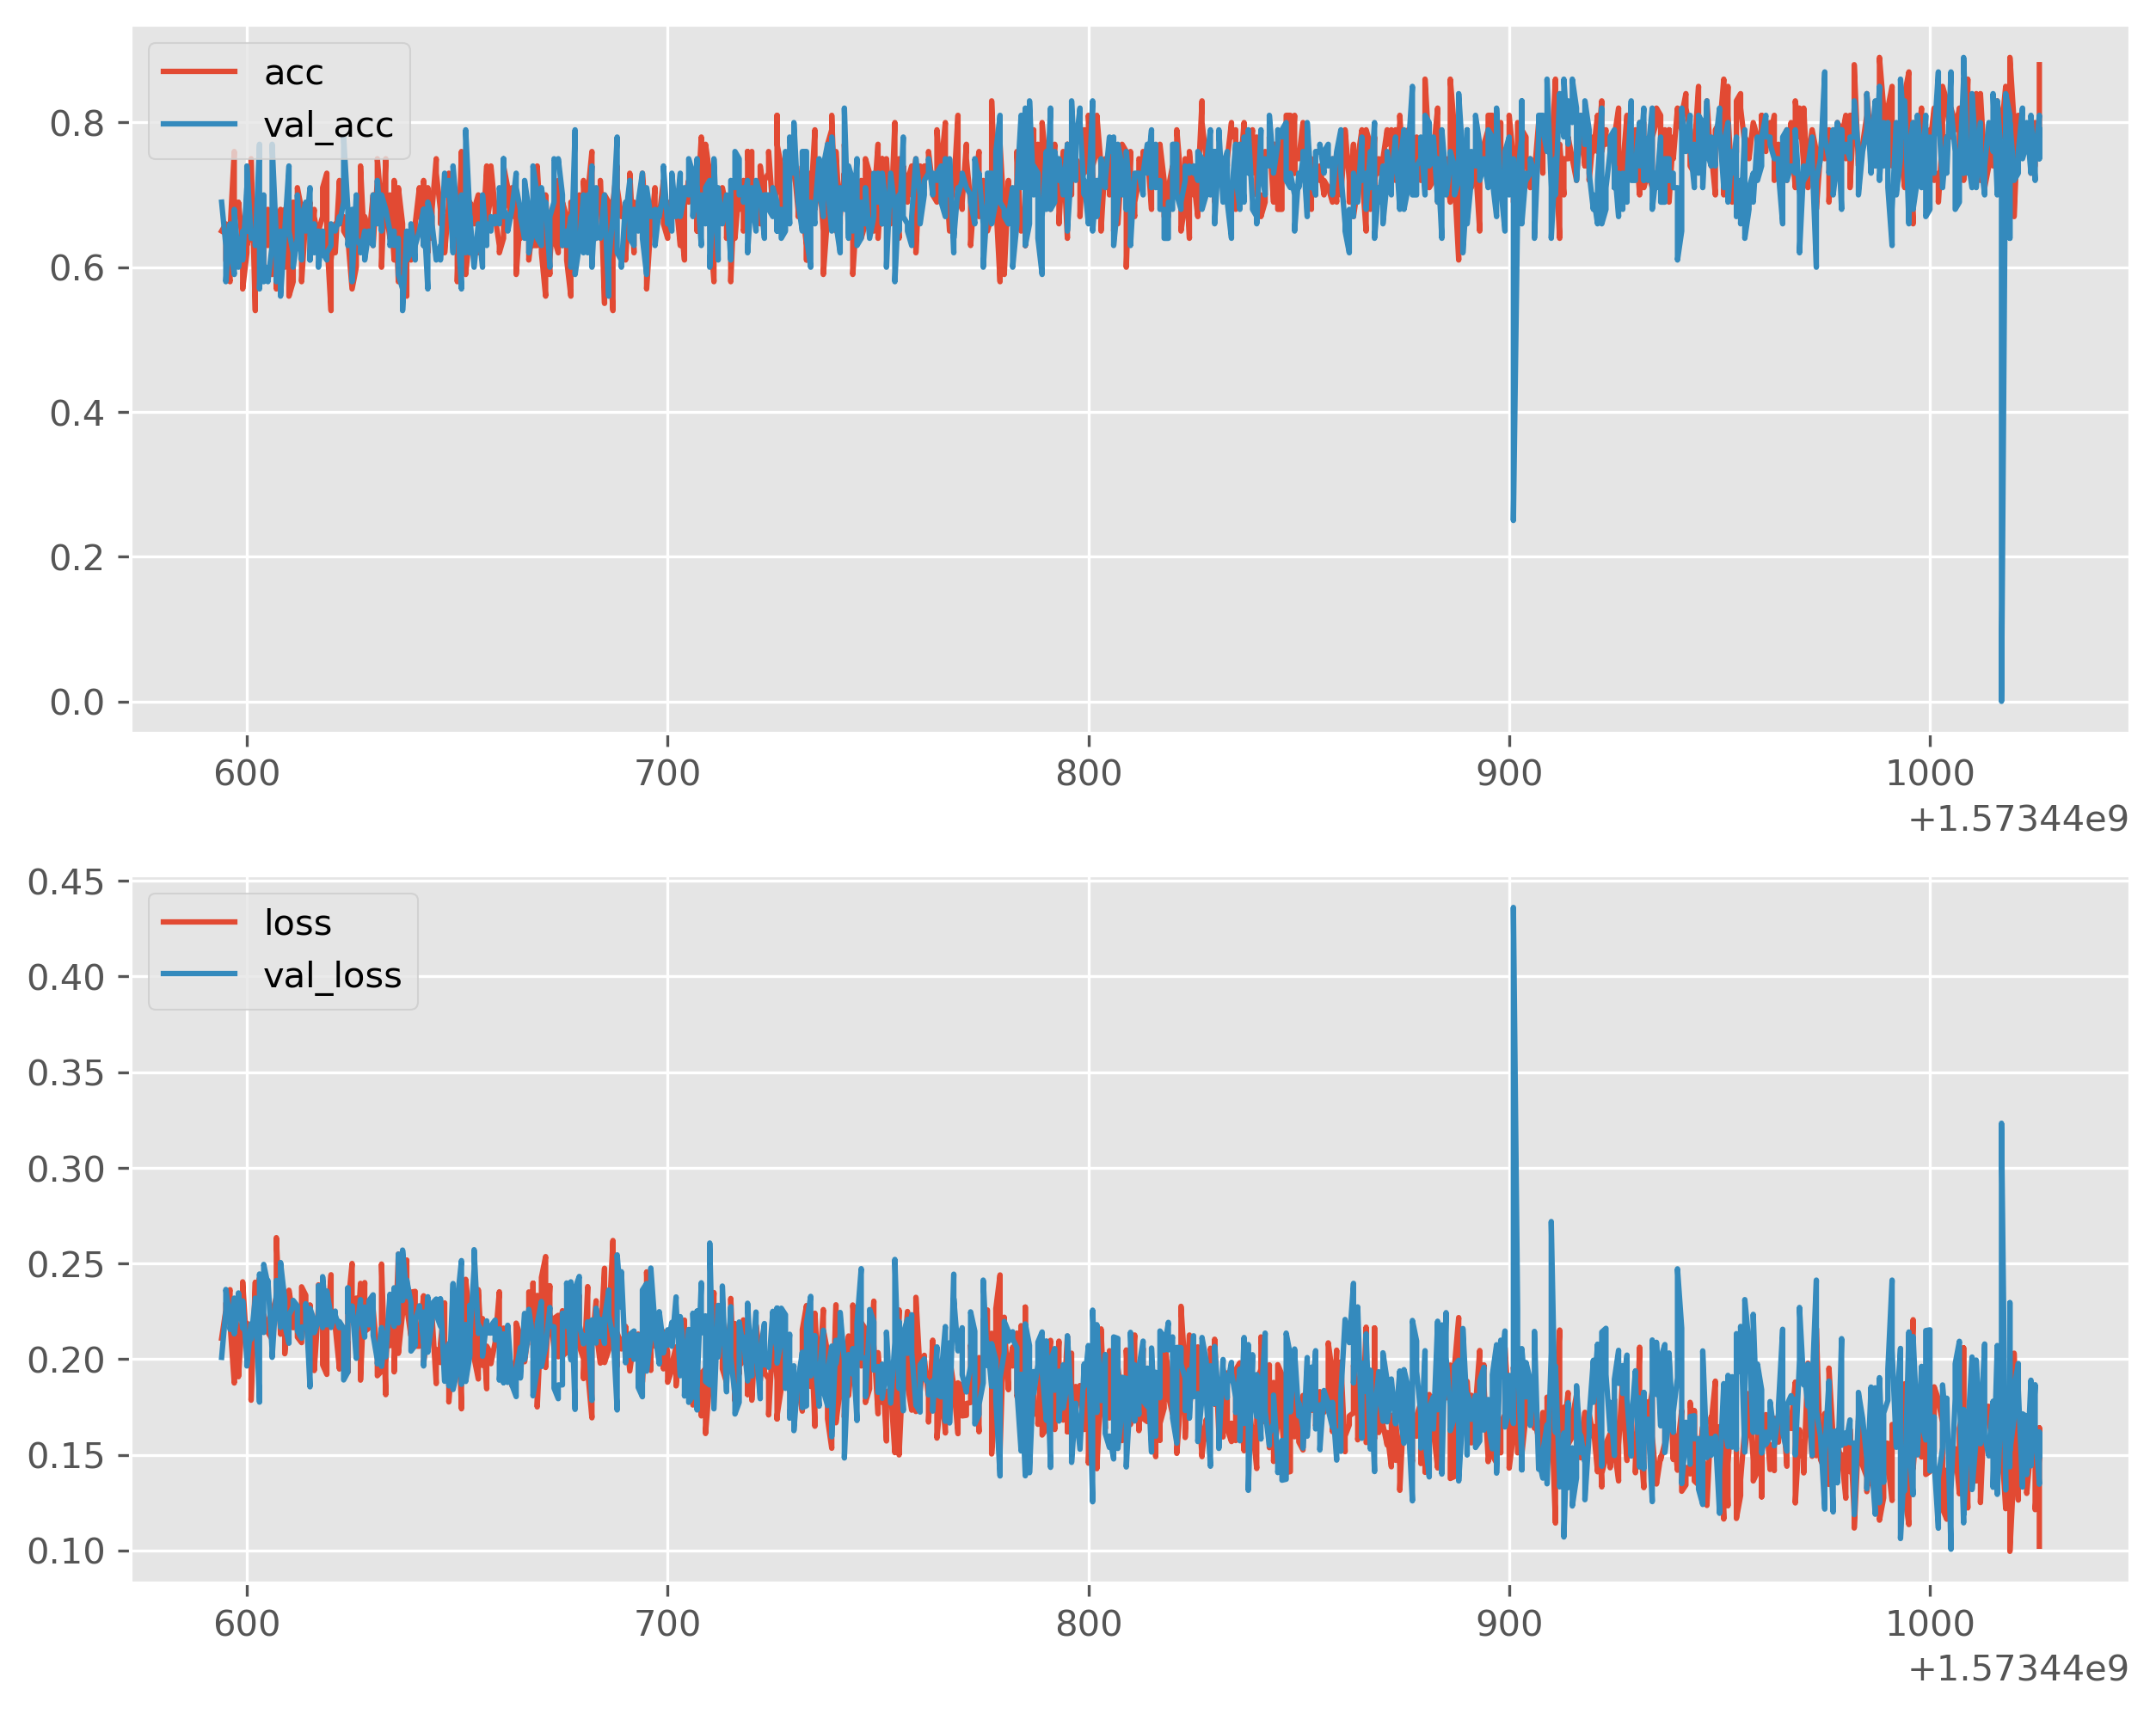

In [120]:
# plot
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")

model_name = "MODEL_NAME1" 
# grab whichever model name you want here.


def create_acc_loss_graph(model_name):
    # read the file and split by new line
    times = []
    accuracies = []
    losses = []
    val_accs = []
    val_losses = []
    # iterate over our contents 
    with open("model.log", "r") as rf:
        contents = rf.read().split("\n")
        for c in contents:
            try:
                c = c.split(',')
                del c[2]
                del c[4]
                name, timestamp, acc, loss, val_acc, val_loss = c

                times.append(float(timestamp))
                accuracies.append(float(acc))
                losses.append(float(loss))

                val_accs.append(float(val_acc))
                val_losses.append(float(val_loss))
            except IndexError:
                    pass

    # plot muti figure
    fig = plt.figure()
    # each ex1 is a figure, 2 by 1 grid, the first one start at (0,0) mark
    fig = plt.figure()

    ax1 = plt.subplot2grid((2,1), (0,0))
    ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)


    ax1.plot(times, accuracies, label="acc")
    ax1.plot(times, val_accs, label="val_acc")
    ax1.legend(loc=2)
    ax2.plot(times,losses, label="loss")
    ax2.plot(times,val_losses, label="val_loss")
    ax2.legend(loc=2)
    plt.show()
    
create_acc_loss_graph(model_name)